# Ski Resort Project
## The results' notebook for case 3: Hoch-Ybrigh
## setup 1: 150 experiments (150 scenarios & No Policy)

This notebook is used for the visualization of the "ema_workbench Ski_Resort" project. The outputs of ema_workbench experiments which have been saved after executing the python codes (XLR_Framework.py) are loaded and various visualization techniques are used and maps are produced.

### *Reading the libraries*

Main libraries are imported here, although there a few libraries that are imported later.

In [1]:
import os
import os.path
import random
from operator import add
from datetime import datetime, date, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import shutil
import ema_workbench
import time

from scipy.integrate import simps
from numpy import trapz
from decimal import Decimal, ROUND_DOWN, ROUND_UP

C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


### *Seting up the display extent*

In [2]:
pd.set_option('display.max_columns',69)
pd.set_option('display.max_rows',119)

## XLR Framework

## Step 5: Model deployment

### Load the outputs

In this section using the load_results class of ema_workbench we load the saved results of python experiments (.tar.gz)

In [3]:
from ema_workbench import load_results, ema_logging
from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter,
                                                   pairs_density)
ema_logging.log_to_stderr(level=ema_logging.DEFAULT_LEVEL)

# load the data
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case1_sattel-hochstuckli'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case2_Atzmaening\CHrandomness_7'
rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_4\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1339\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1822\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2000\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2500\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b1564\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2141\CHrandomness_7'
#rootOut = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2584\CHrandomness_7'

fh = os.path.join(rootOut, '7500_runs.tar.gz')
experiments, outcomes = load_results(fh)

C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
[MainProcess/INFO] results loaded succesfully from C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_4\CHrandomness_7\7500_runs.tar.gz


Check and see if data has been loaded properly or not?

12 parameters:

X2fM, X3iPot, X5temp, X6tempArt, Xfactor1, xClimateModel, xRCP, x1SnowThershold, xGoodDays, scenario, policy, model

In [4]:
print(experiments.shape)
print(list(outcomes.keys()))

(150, 12)
['y', 'y1', 'y3', 'y4', 'y5', 'y6']


## Step 6: Visualization of the EMA_Workbench Results

 the analysis package of ema_workbench contains a wide range of techniques for visualization and analysis of the results from series of computational experiments. 

### Visualization with ema-workbench - part1

[MainProcess/DEBUG] generating pairwise scatter plot


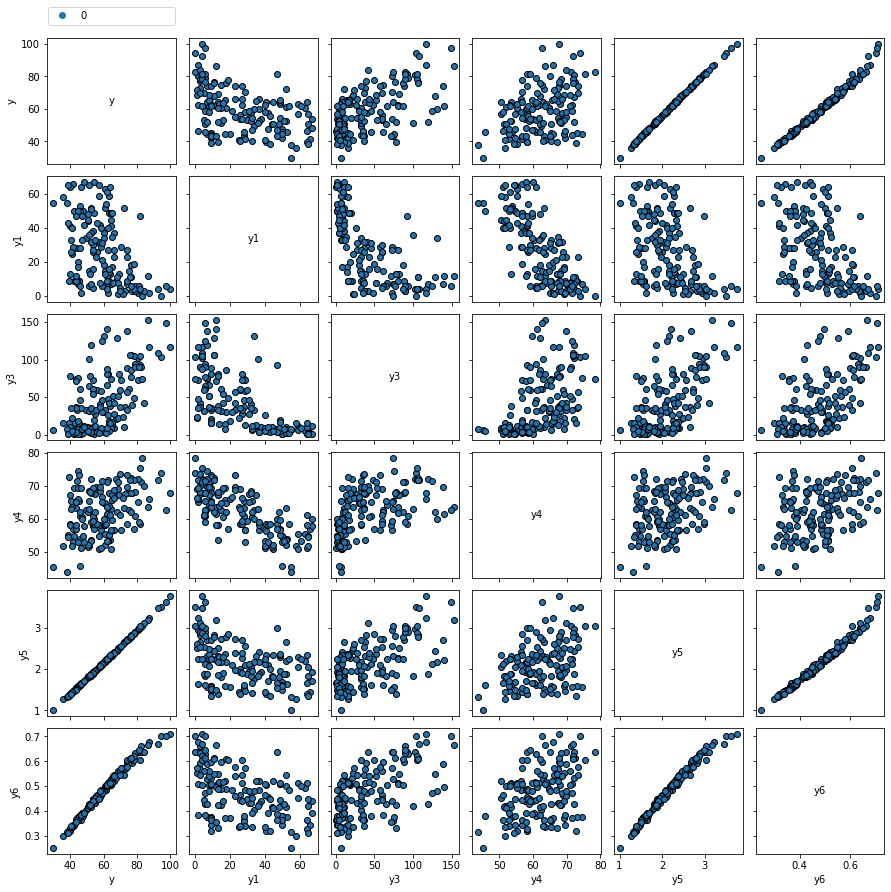

In [5]:
from ema_workbench.analysis import pairs_plotting
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=True)
fig.set_size_inches(15, 15)
fig.savefig(os.path.join(rootOut, 'SA_All_outputs.svg'), format='svg', dpi=600)
plt.show()

### Assign the address of outputs folders

In [6]:
import tarfile

rootVisualization = rootOut
with tarfile.open(os.path.join(rootVisualization, '7500_runs.tar.gz'),"r") as zip_ref:
    zip_ref.extractall(os.path.join(rootVisualization, '7500_runs'))

# We have five types of outputs
outDaily = os.path.join(rootVisualization, 'Outputs_py')
outSeasonTippingPoint = os.path.join(rootVisualization, 'outSeason')
outSeason_Likelihood_survival = os.path.join(rootVisualization, 'outSeason_Likelihood_survival')
outSeasonArtificialSnowPossibility = os.path.join(rootVisualization, 'outSeasonArt')
outSeasonFinancial = os.path.join(rootVisualization, 'outSeasonFinancial')
out_ema = os.path.join(rootVisualization, '7500_runs')

In [7]:
df4_ema_experiment = pd.read_csv(os.path.join(out_ema, 'experiments.csv'))
df4_ema_y = pd.read_csv(os.path.join(out_ema, 'y.csv'), header=None)
df4_ema_y.columns = ["Yout"]
df4_ema_y1 = pd.read_csv(os.path.join(out_ema, 'y1.csv'), header=None)
df4_ema_y1.columns = ["Yout1"]
df4_ema_y3 = pd.read_csv(os.path.join(out_ema, 'y3.csv'), header=None)
df4_ema_y3.columns = ["Yout3" + "_" + str(i) for i in range(118)]
df4_ema_y4 = pd.read_csv(os.path.join(out_ema, 'y4.csv'), header=None)
df4_ema_y4.columns = ["Yout4"]
df4_ema_y5 = pd.read_csv(os.path.join(out_ema, 'y5.csv'), header=None)
df4_ema_y5.columns = ["Yout5"]
df4_ema_y6 = pd.read_csv(os.path.join(out_ema, 'y6.csv'), header=None)
df4_ema_y6.columns = ["Yout6"]

Make a database from the outputs of ema by concatinating the individual outs and experiments

In [8]:
df_final_ema = pd.concat((df4_ema_experiment, df4_ema_y, df4_ema_y1, df4_ema_y3, df4_ema_y4, df4_ema_y5, df4_ema_y6 ), axis = 1)
df_final_ema.head()

X2fM       X3iPot    X5temp  X6tempArt  Xfactor1  xClimateModel  \
0  1.493073  1026.228739  5.359024  -1.319319  1.941707       0.231290   
1  1.607172  1067.011843  3.832917  -1.625347  0.778372       0.679990   
2  1.442909   992.691474  3.409192  -1.827720  1.019778       0.608695   
3  1.366939   963.433051  3.737513  -1.727605  2.195425       0.444924   
4  1.270060  1055.114065  4.092879  -1.131521  0.675199       0.806133   

       xRCP  x1SnowThershold  xGoodDays  scenario  policy     model  \
0  1.980683       299.118621  99.011241         0       0  UZHModel   
1  2.014617       299.118621  99.011241         1       0  UZHModel   
2  3.252930       299.118621  99.011241         2       0  UZHModel   
3  3.352779       299.118621  99.011241         3       0  UZHModel   
4  2.088706       299.118621  99.011241         4       0  UZHModel   

        Yout  Yout1     Yout3_0     Yout3_1     Yout3_2     Yout3_3  \
0  65.235011     17   88.670028   85.515521   28.051179   56.112856   
1  43.451876     28   39.233499  100.036868   37.792900   82.029653   
2  29.677428     55   65.865976   38.647878  108.526570  109.904162   
3  41.949054     50   14.589663  138.990209  111.490982   72.175146   
4  54.544282     31  101.028732   58.389611   22.036141   78.402408   

      Yout3_4     Yout3_5     Yout3_6     Yout3_7     Yout3_8     Yout3_9  \
0  125.352324  119.879004   44.630989  121.314886  129.189967   69.502594   
1  122.454739   59.415927   45.755727   31.290496   41.774263   37.452566   
2    5.834976  100.759419   96.658810   20.713288  100.055285   92.766670   
3   77.914775   43.782095  103.239467   28.539179   92.533624  116.195934   
4  170.194813   56.401136    6.317861   89.284856  140.295055   41.238991   

     Yout3_10    Yout3_11    Yout3_12    Yout3_13   Yout3_14   Yout3_15  \
0  117.907216  123.280593   74.844755   81.082080  83.737874  47.858204   
1   78.885783   76.633578   85.548585  135.055697  41.584038   9.750346   
2   37.939363  109.758473   72.315746   58.452028  57.295998  38.741620   
3   86.230267  112.727267  100.782799   79.028229  95.583481  16.143328   
4  132.340273   98.164414   84.825879   86.172384  93.403212  55.872583   

     Yout3_16    Yout3_17    Yout3_18   Yout3_19  ...   Yout3_87   Yout3_88  \
0   87.218640  127.706836   94.999301  95.607861  ...  68.603369  25.073765   
1   58.052670  116.546620   26.651835  46.267263  ...   6.655353  12.748187   
2   27.855036   71.172701   89.137480  60.401054  ...   8.765319   9.828776   
3   17.062495   49.851193   72.960286  35.133252  ...  13.023195  46.408545   
4  101.544406   88.502309  133.915291  74.971194  ...  66.534280  48.515168   

    Yout3_89   Yout3_90   Yout3_91   Yout3_92   Yout3_93   Yout3_94  \
0  24.440271  56.181591  41.605334  31.635677  59.321148  38.974504   
1  19.219934  13.175342  11.316347  56.151832  28.319400   6.367340   
2  36.009193   4.265097   3.969295   2.903932   7.431700   2.473433   
3   9.604852   1.717312   2.495398  20.427448  11.008275  89.965960   
4   3.236776  15.843614  15.769062  11.841122  50.145591   5.363190   

    Yout3_95   Yout3_96   Yout3_97   Yout3_98   Yout3_99  Yout3_100  \
0  67.171010  36.143888  97.764629  58.530411   3.624214  53.880932   
1  71.101023  10.524387  34.655649  37.301121  56.079157  32.049760   
2   2.268364   2.396641   4.508211   3.388321   4.204152   1.924019   
3  28.502204   8.190363  15.447250  10.656608   3.441912  23.900451   
4  92.991837  84.158212  16.219585  29.069337   2.207820  19.632679   

    Yout3_101  Yout3_102  Yout3_103  Yout3_104  Yout3_105  Yout3_106  \
0  107.996976  28.918728  40.586942   7.966706  47.730796  41.844737   
1   41.048397  30.968784  49.314182  41.786767   9.340609  22.837361   
2   47.608002   2.420645   1.918938   7.067765  14.421402   1.529092   
3    4.768443  28.697010   5.200612  25.664902   4.466589  20.363293   
4    2.644135  13.229601  32.141128  21.454097   7.729743  16.041061   

   Yout3_107   Yout3_108  Yout3_

In [9]:
# Taking the values
x2 = df_final_ema['X2fM'].values
x3 = df_final_ema['X3iPot'].values
x5 = df_final_ema['X5temp'].values
x6 = df_final_ema['X6tempArt'].values
xRCP = df_final_ema['xRCP'].values
xClimateModel = df_final_ema['xClimateModel'].values
x1SnowThershold = df_final_ema['x1SnowThershold'].values
xGoodDays = df_final_ema['xGoodDays'].values

YY = df_final_ema['Yout'].values
y1 = df_final_ema['Yout1'].values
y3 = df_final_ema['Yout3_95'].values
y4 = df_final_ema['Yout4'].values
y5 = df_final_ema['Yout5'].values
y6 = df_final_ema['Yout6'].values

In [16]:
outFolder = rootVisualization
outSeasonFolder = os.path.join(outFolder, 'outSeason')
outSeasonFinancial = os.path.join(outFolder, 'outSeasonFinancial')
outSeasonArt = os.path.join(outFolder, 'outSeasonArt')
outSeason_Likelihood_survival = os.path.join(outFolder, 'outSeason_Likelihood_survival')

In [17]:
#### 2020/07/22 ####
all_Files = []
for filename in os.walk(outSeasonFolder):
    all_Files = filename[2]
    
totalFiles_loc = []
for i in range(len(all_Files)):
    totalFiles_loc.append(os.path.join(outSeasonFolder, all_Files[i]))
    
### 2020/08/23
all_Files_fin = []
for filename in os.walk(outSeasonFinancial):
    all_Files_fin = filename[2]
    
totalFiles_loc_fin = []
for i in range(len(all_Files_fin)):
    totalFiles_loc_fin.append(os.path.join(outSeasonFinancial, all_Files_fin[i]))
    
### 2020/08/23
all_Files_Art = []
for filename in os.walk(outSeasonArt):
    all_Files_Art = filename[2]
    
totalFiles_loc_Art = []
for i in range(len(all_Files_Art)):
    totalFiles_loc_Art.append(os.path.join(outSeasonArt, all_Files_Art[i]))

### 2020/08/23
all_Files_Like = []
for filename in os.walk(outSeason_Likelihood_survival):
    all_Files_Like = filename[2]
    
totalFiles_loc_Like = []
for i in range(len(all_Files_Like)):
    totalFiles_loc_Like.append(os.path.join(outSeason_Likelihood_survival, all_Files_Like[i]))


#### Total number of outputs (csv files) in each out folder produced by our framework

In [18]:
print(len(totalFiles_loc))
print(len(totalFiles_loc_fin))
print(len(totalFiles_loc_Art))
print(len(totalFiles_loc_Like))

150
150
150
150


In [19]:
emptyMatrixGoodDays = [np.empty([119, 69]) for _ in range(len(totalFiles_loc))]
    
for i in range(0, len(totalFiles_loc), 1):
    b = []
    with open(totalFiles_loc[i], 'r') as file:
        outputReaderlines = file.readlines()
        for j in range (len(outputReaderlines)):
            b.append(outputReaderlines[j].replace('\n','').split(','))
    
    emptyMatrixGoodDays[i] = np.array(b)

### 2020/08/23
emptyMatrixfin = [np.empty([119, 69]) for _ in range(len(totalFiles_loc_fin))]

for i in range(0, len(totalFiles_loc_fin), 1):
    b = []
    with open(totalFiles_loc_fin[i], 'r') as file:
        outputReaderlines_fin = file.readlines()
        for j in range (len(outputReaderlines_fin)):
            b.append(outputReaderlines_fin[j].replace('\n','').split(','))
    
    emptyMatrixfin[i] = np.array(b)

### 2020/08/23
emptyMatrixArt = [np.empty([119, 69]) for _ in range(len(totalFiles_loc_Art))]

for i in range(0, len(totalFiles_loc_Art), 1):
    b = []
    with open(totalFiles_loc_Art[i], 'r') as file:
        outputReaderlines_Art = file.readlines()
        for j in range (len(outputReaderlines_Art)):
            b.append(outputReaderlines_Art[j].replace('\n','').split(','))
    
    emptyMatrixArt[i] = np.array(b)
    
### 2020/08/23
emptyMatrixLike = [np.empty([119, 69]) for _ in range(len(totalFiles_loc_Like))]

for i in range(0, len(totalFiles_loc_Like), 1):
    b = []
    with open(totalFiles_loc_Like[i], 'r') as file:
        outputReaderlines_Like = file.readlines()
        for j in range (len(outputReaderlines_Like)):
            b.append(outputReaderlines_Like[j].replace('\n','').split(','))
    
    emptyMatrixLike[i] = np.array(b)

In [20]:
#matrix_GoodDays = np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1)), axis=2)
matrix_GoodDays = np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1)), axis=0)
matrix_fin = np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1)), axis=0)
matrix_Art = np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1)), axis=0)
matrix_Like = np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1)), axis=0)

In [21]:
print(matrix_GoodDays.shape)
print(matrix_fin.shape)
print(matrix_Art.shape)
print(matrix_Like.shape)

(150, 119, 2)
(150, 119, 2)
(150, 119, 2)
(150, 119, 2)


#### Check the header of outputs

In [22]:
print(emptyMatrixGoodDays[1][0,1])
print(emptyMatrixfin[1][0,1])
print(emptyMatrixArt[1][0,1])
print(emptyMatrixLike[1][0,1])

isOverSnow_SMHI-RCA-GFDL-EUR44-RCP45-pcp
Money_SMHI-RCA-GFDL-EUR44-RCP45-pcp
ArtSnowPossibility_SMHI-RCA-GFDL-EUR44-RCP45-pcp
isOverSnow_SMHI-RCA-GFDL-EUR44-RCP45-pcp


In [23]:
matrix_GoodDays26= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP26' in emptyMatrixGoodDays[i][0,1] or \
                             '_26_' in emptyMatrixGoodDays[i][0,1] ) , axis=0) 
matrix_GoodDays45= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP45' in emptyMatrixGoodDays[i][0,1] or \
                            '_45_' in emptyMatrixGoodDays[i][0,1] ), axis=0)
matrix_GoodDays85= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP85' in emptyMatrixGoodDays[i][0,1] or \
                            '_85_' in emptyMatrixGoodDays[i][0,1]), axis=0) 

### 2020/08/23
matrix_fin26= np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1) \
                             if 'RCP26' in emptyMatrixfin[i][0,1] or \
                             '_26_' in emptyMatrixfin[i][0,1] ) , axis=0) 
matrix_fin45= np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1) \
                             if 'RCP45' in emptyMatrixfin[i][0,1] or \
                            '_45_' in emptyMatrixfin[i][0,1] ), axis=0)
matrix_fin85= np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1) \
                             if 'RCP85' in emptyMatrixfin[i][0,1] or \
                            '_85_' in emptyMatrixfin[i][0,1]), axis=0) 

### 2020/08/23
matrix_Art26= np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1) \
                             if 'RCP26' in emptyMatrixArt[i][0,1] or \
                             '_26_' in emptyMatrixArt[i][0,1] ) , axis=0) 
matrix_Art45= np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1) \
                             if 'RCP45' in emptyMatrixArt[i][0,1] or \
                            '_45_' in emptyMatrixArt[i][0,1] ), axis=0)
matrix_Art85= np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1) \
                             if 'RCP85' in emptyMatrixArt[i][0,1] or \
                            '_85_' in emptyMatrixArt[i][0,1]), axis=0) 

### 2020/08/23
matrix_Like26= np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1) \
                             if 'RCP26' in emptyMatrixLike[i][0,1] or \
                             '_26_' in emptyMatrixLike[i][0,1] ) , axis=0) 
matrix_Like45= np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1) \
                             if 'RCP45' in emptyMatrixLike[i][0,1] or \
                            '_45_' in emptyMatrixLike[i][0,1] ), axis=0)
matrix_Like85= np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1) \
                             if 'RCP85' in emptyMatrixLike[i][0,1] or \
                            '_85_' in emptyMatrixLike[i][0,1]), axis=0) 

In [24]:
print(type(matrix_GoodDays))
print(matrix_GoodDays.ndim)
print(len(matrix_GoodDays))
print(matrix_GoodDays.size)
print(matrix_GoodDays.dtype)
print(matrix_GoodDays.dtype.name)
print("#########")
print(matrix_GoodDays26.shape)
print(matrix_GoodDays45.shape)
print(matrix_GoodDays85.shape)
print(len(matrix_GoodDays26) + len(matrix_GoodDays45) + len(matrix_GoodDays85))
print("#########")
print(matrix_fin26.shape)
print(matrix_fin45.shape)
print(matrix_fin85.shape)
print(len(matrix_fin26) + len(matrix_fin45) + len(matrix_fin85))
print("#########")
print(matrix_Art26.shape)
print(matrix_Art45.shape)
print(matrix_Art85.shape)
print(len(matrix_Art26) + len(matrix_Art45) + len(matrix_Art85))
print("#########")
print(matrix_Like26.shape)
print(matrix_Like45.shape)
print(matrix_Like85.shape)
print(len(matrix_Like26) + len(matrix_Like45) + len(matrix_Like85))

<class 'numpy.ndarray'>
3
150
35700
<U47
str1504
#########
(50, 119, 2)
(50, 119, 2)
(50, 119, 2)
150
#########
(50, 119, 2)
(50, 119, 2)
(50, 119, 2)
150
#########
(50, 119, 2)
(50, 119, 2)
(50, 119, 2)
150
#########
(50, 119, 2)
(50, 119, 2)
(50, 119, 2)
150


In [25]:
print(matrix_GoodDays[2, 1:, 1:2].shape)
print(matrix_fin[2, 1:, 1:2].shape)
print(matrix_Art[2, 1:, 1:2].shape)
print(matrix_Like[2, 1:, 1:2].shape)

(118, 1)
(118, 1)
(118, 1)
(118, 1)


### Calculate the quantiles for each year of simulation (1981-2100)

In [26]:
q10_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.9, axis=0)


In [27]:
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)

#2020/08/23
print(q10_years_fin[0])
print(q25_years_fin[0])
print(q50_years_fin[0])
print(q75_years_fin[0])
print(q90_years_fin[0])
print(q50_years_fin.shape)

print(q10_years_Art[0])
print(q25_years_Art[0])
print(q50_years_Art[0])
print(q75_years_Art[0])
print(q90_years_Art[0])
print(q50_years_Art.shape)

print(q10_years_Like[0])
print(q25_years_Like[0])
print(q50_years_Like[0])
print(q75_years_Like[0])
print(q90_years_Like[0])
print(q50_years_Like.shape)

[22.82163172]
[39.51644661]
[62.37201136]
[81.98054259]
[106.846943]
(118, 1)
[0.765]
[1.3125]
[2.205]
[2.875]
[3.974]
(118, 1)
[53.115]
[60.1775]
[66.065]
[77.0475]
[86.494]
(118, 1)
[23.04953611]
[39.91107096]
[62.99487897]
[82.79922749]
[100.]
(118, 1)


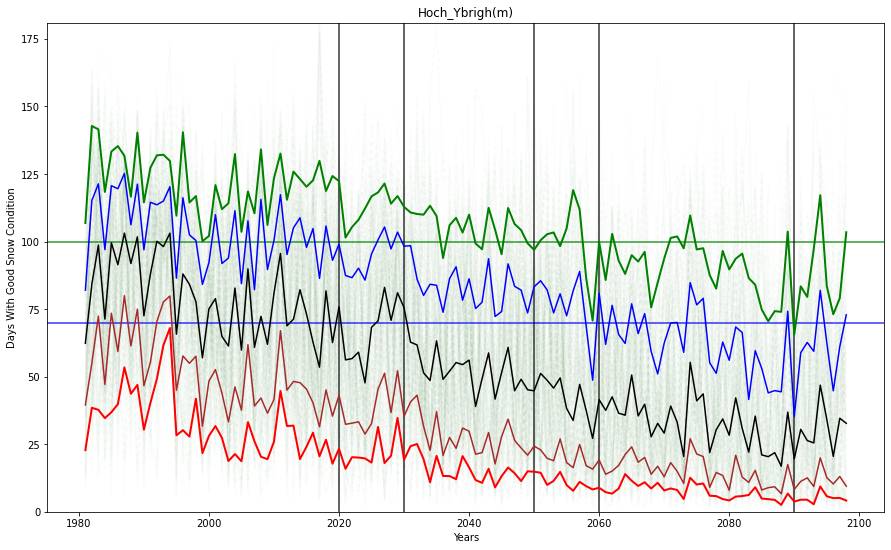

In [31]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, 150, 1):
    a = matrix_GoodDays[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.01)


axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=70, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=0, top =181)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP_All_number_of_day_goodSnow.svg'), format='svg', dpi=300)

plt.show()

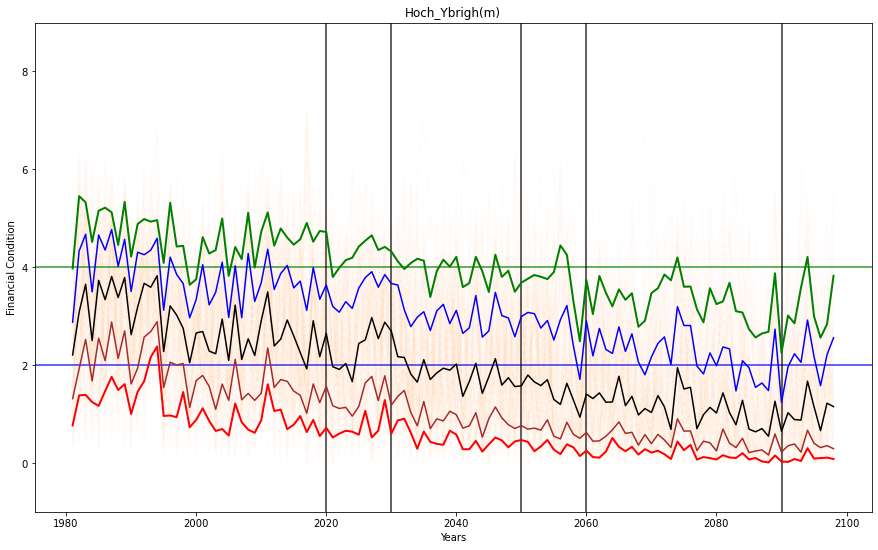

In [32]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, 150, 1):
    a = matrix_fin[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=0.01)


axs.axhline(y=4, color='green', alpha=0.8)
axs.axhline(y=2, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_fin, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_fin, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_fin, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_fin, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_fin, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=-1, top =9)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Financial Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP_All_Financial.svg'), format='svg', dpi=300)

plt.show()

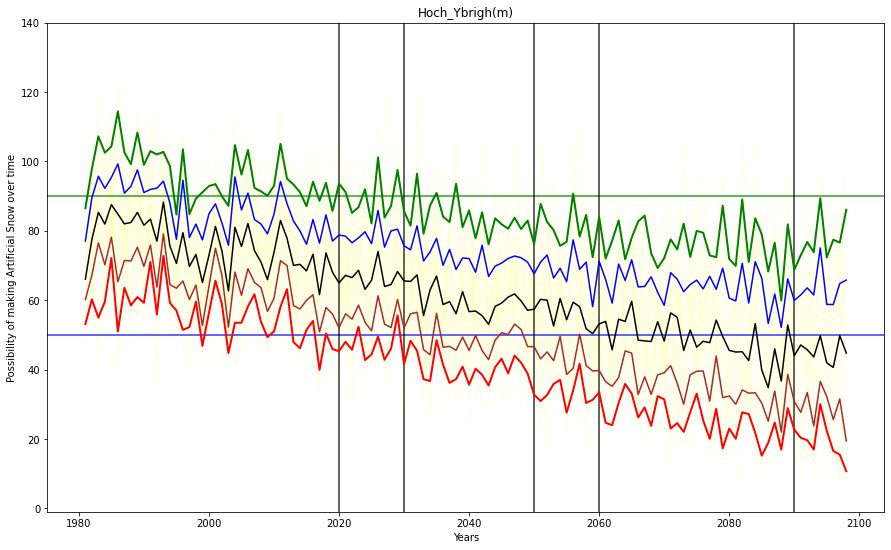

In [33]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, 150, 1):
    a = matrix_Art[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='yellow', linestyle = '--', alpha=0.01)


axs.axhline(y=90, color='green', alpha=0.8)
axs.axhline(y=50, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_Art, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_Art, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_Art, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_Art, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_Art, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=-1, top =140)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Possibility of making Artificial Snow over time')

fig.savefig(os.path.join(rootVisualization, 'RCP_All_ArtSnow.svg'), format='svg', dpi=300)

plt.show()

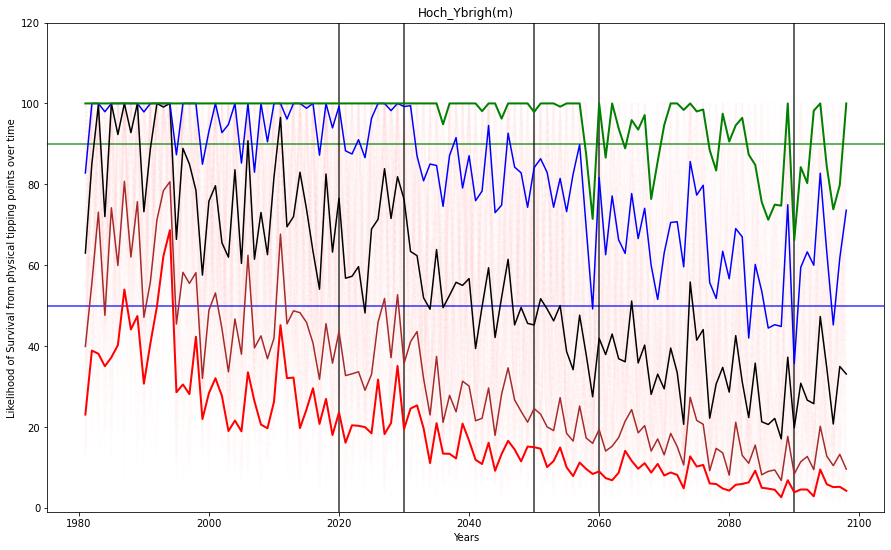

In [34]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, 150, 1):
    a = matrix_Like[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='pink', linestyle = '--', alpha=0.01)


axs.axhline(y=90, color='green', alpha=0.8)
axs.axhline(y=50, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_Like, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_Like, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_Like, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_Like, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_Like, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=-1, top =120)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Likelihood of Survival from physical tipping points over time')

fig.savefig(os.path.join(rootVisualization, 'RCP_All_Likelihood.svg'), format='svg', dpi=300)

plt.show()

### Visualization with ema-workbench - part2 

## Scenario Discovery 
### A model driven approach to scenario development

There is ample literature on both CART and PRIM and their relative merits for use in scenario discovery.

In [35]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['y'] < 80
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 150 points remaining, containing 136 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xClimateModel
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xClimateModel
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xClimateModel
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xClimateModel
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xClimateModel
[MainProcess/DEBUG] pasting x

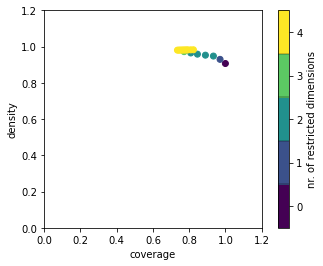

In [36]:
#import mpld3
box1.show_tradeoff()
plt.show()
#mpld3.display()
fig.savefig(os.path.join(rootVisualization, 'box.svg'), format='svg', dpi=600)

coverage    0.786765
density     0.981651
id                14
mass        0.726667
mean        0.981651
res_dim            4
Name: 14, dtype: object

                 box 14                                       
                    min       max                    qp values
X5temp         3.014645  5.369132  [-1.0, 0.00673523320055924]
Xfactor1       0.538303  3.483509  [0.42628528478966166, -1.0]
xClimateModel  0.013387  0.994498  [0.43245142043386375, -1.0]
xRCP           0.662229  3.478408   [0.4565288046459586, -1.0]



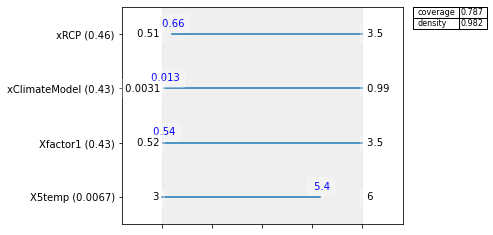

In [37]:
# Saeed : explore the inspect effect
box1.inspect(14)
box1.inspect(14, style='graph')
plt.show()

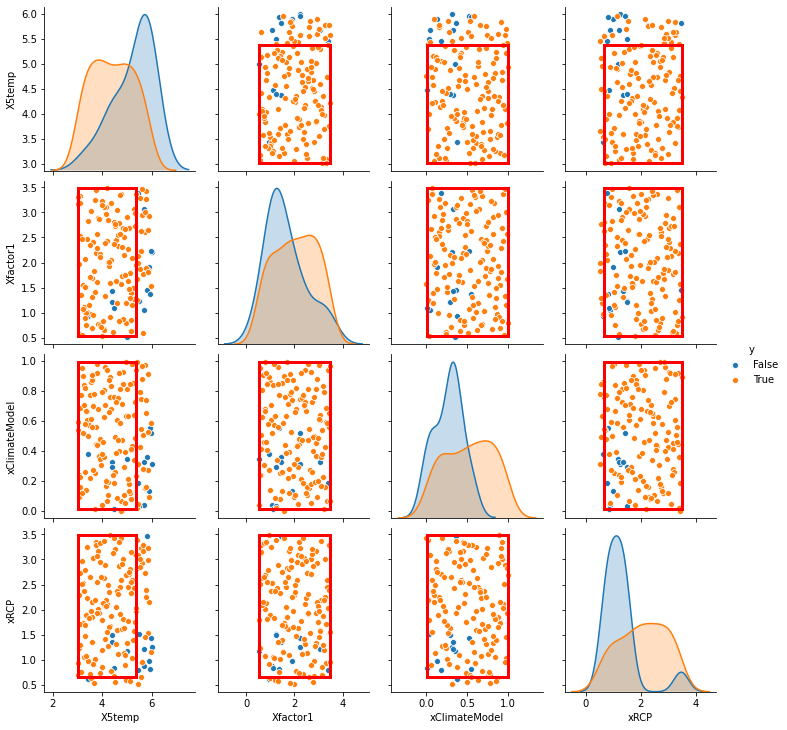

In [39]:
# fig, axs = plt.subplots()
axs = box1.show_pairs_scatter(14)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'multi_graphs_gooddays.svg'), format='svg', dpi=600)

In [40]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 36 points remaining, containing 24 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X2fM
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting X2fM
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting completed
[MainProcess/INFO] mean: 0.95, mass: 0.13333333333333333, coverage: 0.13970588235294118, density: 0.95 restricted_dimensions: 3


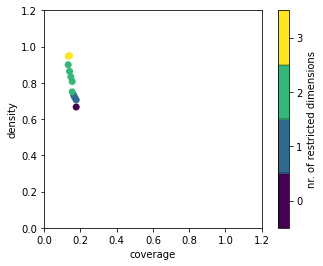

In [41]:
#import mpld3
box2.show_tradeoff()
plt.show()
#mpld3.display()
fig.savefig(os.path.join(rootVisualization, 'box2.svg'), format='svg', dpi=600)

### likelihood of survival analysis

In [42]:
x = experiments
y = outcomes['y6'] < 0.6
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 150 points remaining, containing 127 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X2fM
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xClimateModel
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X2fM
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xClimateModel
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X2fM
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xClimateModel
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X2fM
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xClimateModel
[MainProcess/DEBUG] pasting xRCP
[MainProces

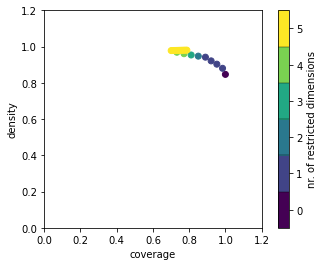

In [43]:
box1.show_tradeoff()
plt.show()
fig.savefig(os.path.join(rootVisualization, 'box_liklihood.svg'), format='svg', dpi=600)

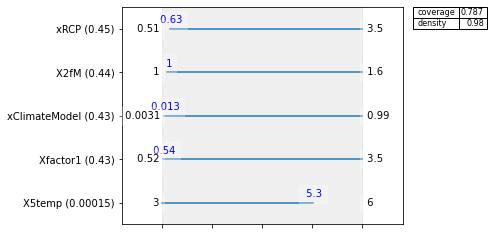

In [44]:
# Saeed : explore the inspect effect
box1.inspect(20, style='graph')
plt.show()

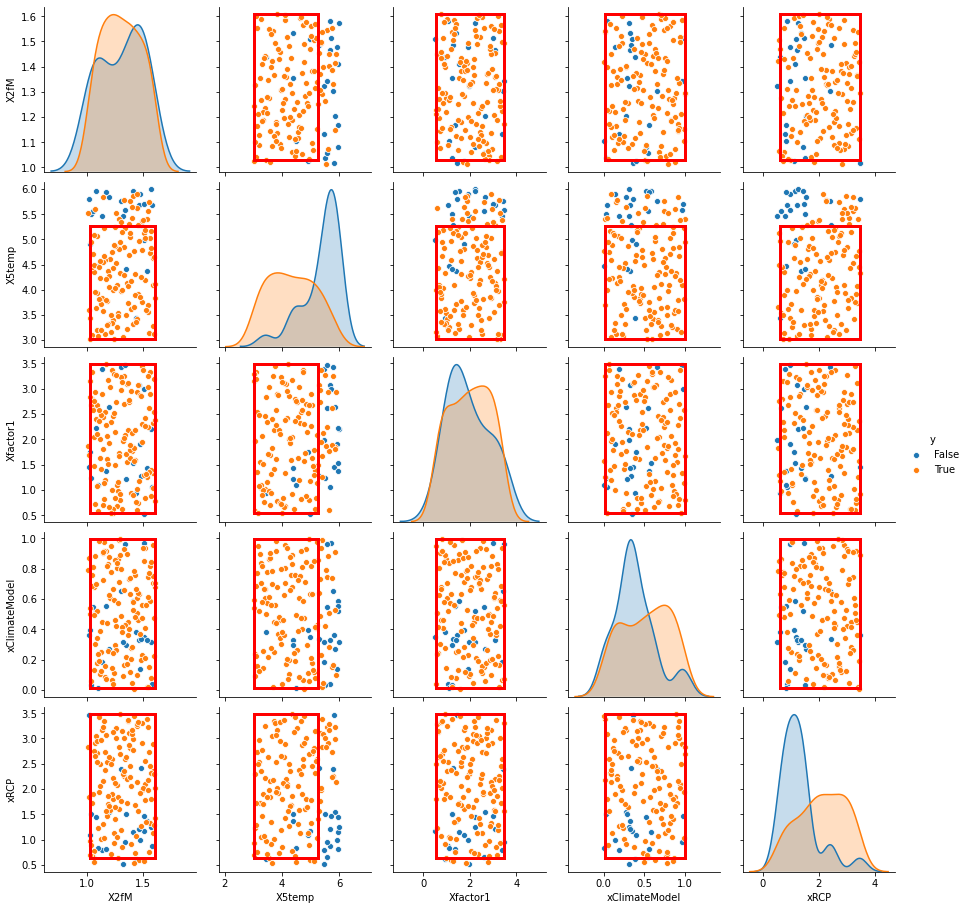

In [46]:
#fig, axs = plt.subplots()
axs = box1.show_pairs_scatter(20)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'multi_graphs_likehood.svg'), format='svg', dpi=600)

### Artifical snow analysis

In [47]:
x = experiments
y = outcomes['y4'] < 60
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 150 points remaining, containing 59 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting completed
[MainProcess/INFO] mean: 0.9622641509433962, mass: 0.35333333333333333, coverage: 0.864406779661017, density: 0.9622641509433962 restricted_dimensions: 2


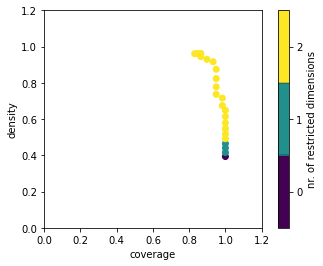

In [48]:
box1.show_tradeoff()
plt.show()
fig.savefig(os.path.join(rootVisualization, 'box_Artificial.svg'), format='svg', dpi=600)

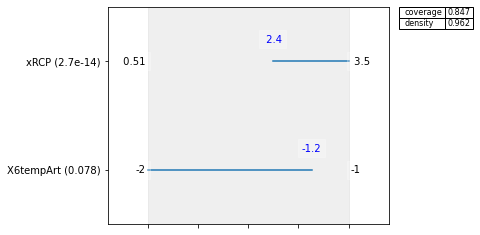

In [49]:
# Saeed : explore the inspect effect
box1.inspect(20, style='graph')
plt.show()

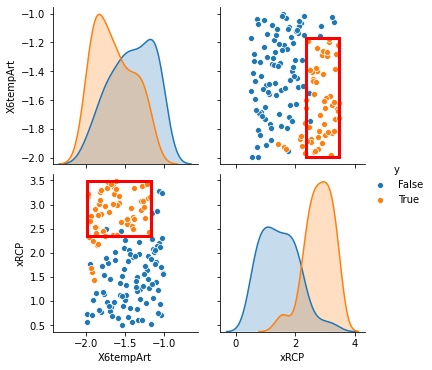

In [50]:
#fig, axs = plt.subplots()
axs = box1.show_pairs_scatter(21)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'multi_graphs_Artificial.svg'), format='svg', dpi=600)

### Visualization with ema-workbench - part3

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


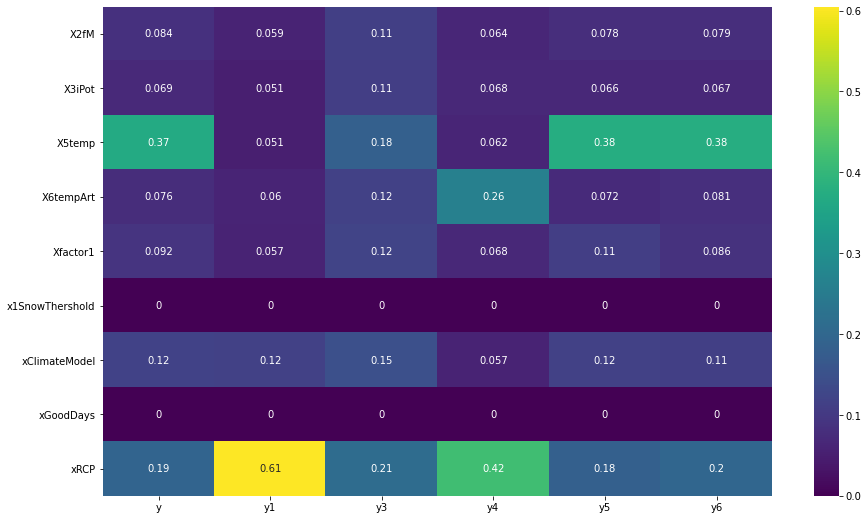

In [51]:
from ema_workbench.analysis import feature_scoring

fig, ax = plt.subplots(figsize=(15,9))

x = experiments
Y = outcomes

fs = feature_scoring.get_feature_scores_all(x, Y)
ax = sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

fig.savefig(os.path.join(rootVisualization, 'matrix_importance.svg'), format='svg', dpi=600)

In [52]:
x = experiments
Y = outcomes['y'] < 70
#fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=feature_scoring.CLASSIFICATION)
fs, alg = feature_scoring.get_ex_feature_scores(x, Y)

fs.sort_values(ascending=False, by=1)

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


1
0                        
X5temp           0.248773
xRCP             0.204657
xClimateModel    0.138737
X6tempArt        0.121655
Xfactor1         0.105932
X2fM             0.090136
X3iPot           0.090110
x1SnowThershold  0.000000
xGoodDays        0.000000

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


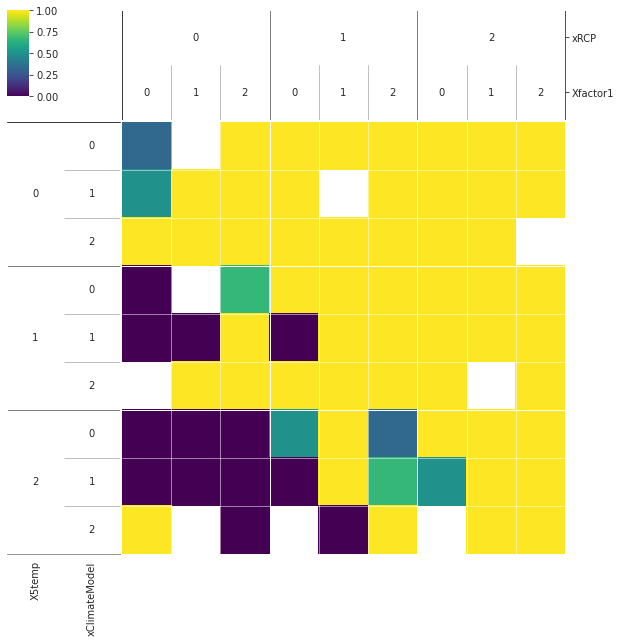

In [53]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['y'] < 70
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_rel_gooddays.svg'), format='svg', dpi=600)

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


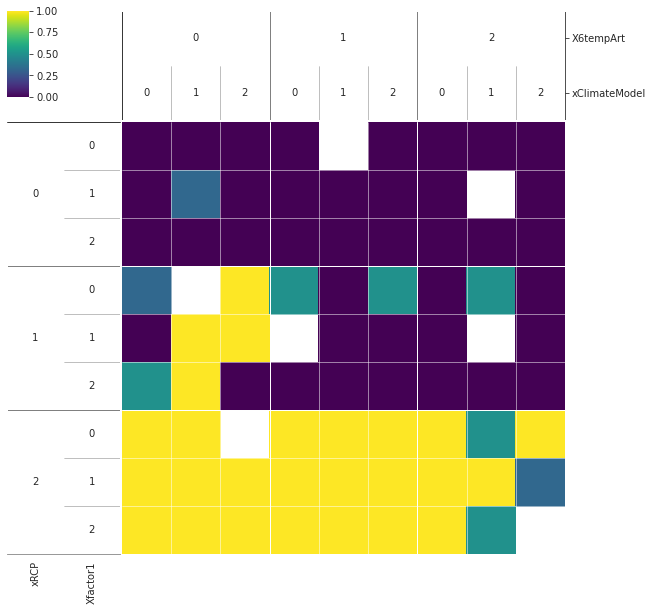

In [54]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['y4'] < 60
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_rel_Artificial.svg'), format='svg', dpi=600)

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


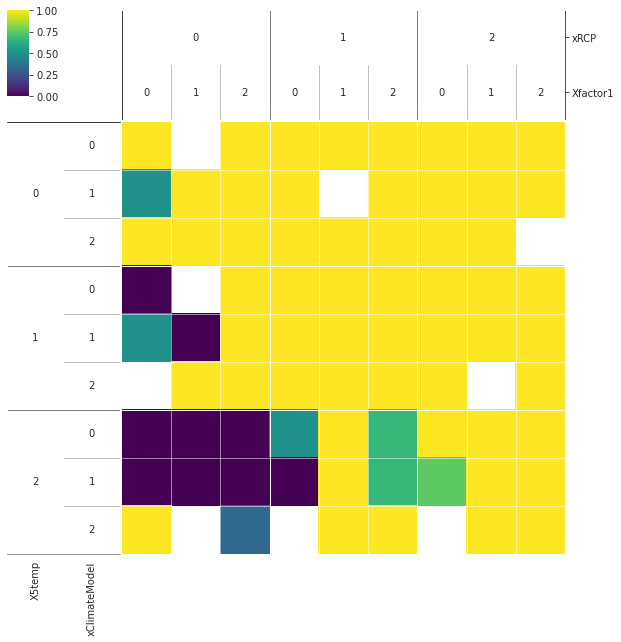

In [55]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['y6'] < 0.6
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_rel_Liklehood.svg'), format='svg', dpi=600)

C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 299.1186205478411 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 99.01124089428477 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)


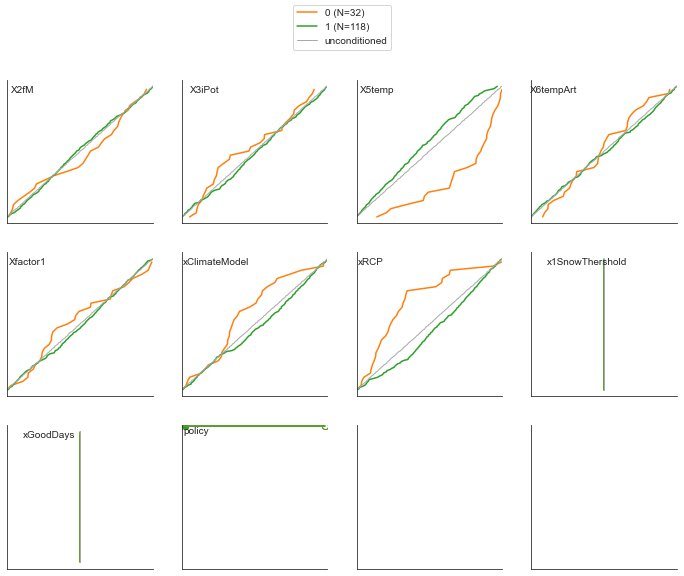

In [56]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['y'] < 70
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_sensitivity_gooddays.svg'), format='svg', dpi=600)

C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 299.1186205478411 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 99.01124089428477 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)


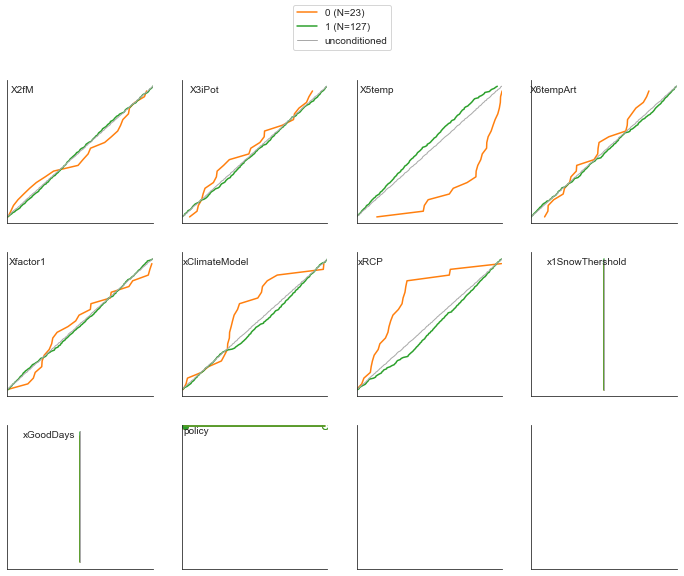

In [57]:
sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['y6'] < 0.6
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_sensitivity_Artificial.svg'), format='svg', dpi=600)

C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 299.1186205478411 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 99.01124089428477 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)


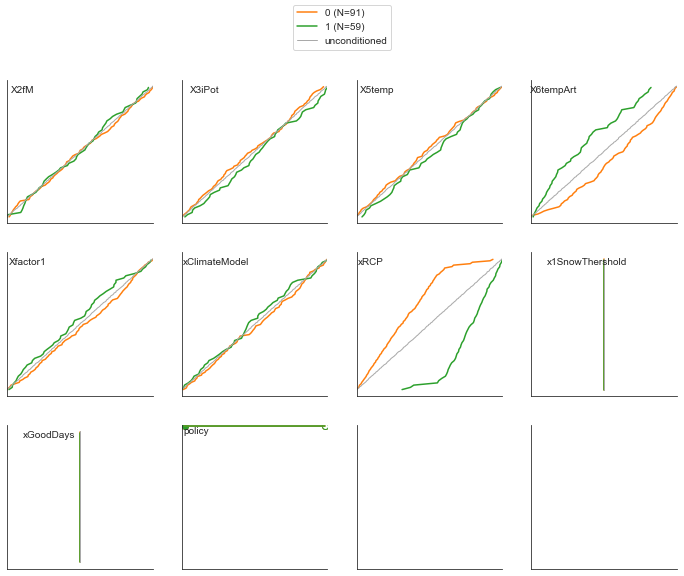

In [58]:
sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['y4'] < 60
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()
fig.savefig(os.path.join(rootVisualization, 'matrix_sensitivity_Artificial.svg'), format='svg', dpi=600)

### Scatter Plots (Inputs vs Outputs)

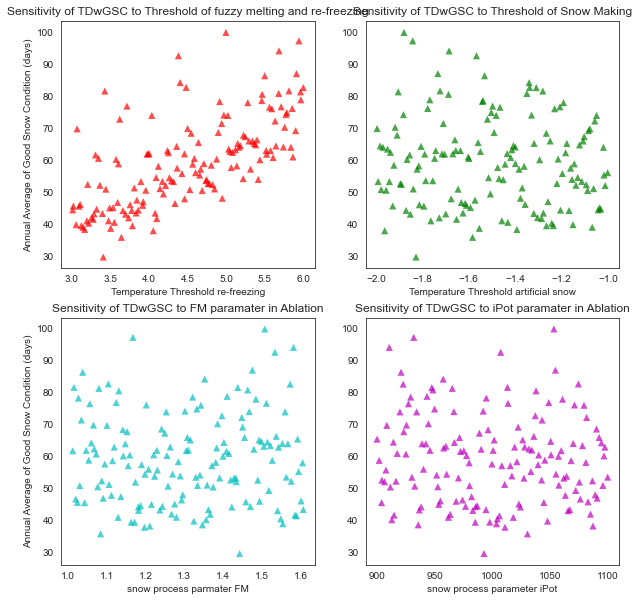

In [59]:
#fig, (ax1, ax2) = plt.subplots(1,2)
fig, axs = plt.subplots(2, 2, figsize=(10,10))
#axs[0,0].scatter(xGoodDays, y, s = 200, c='b' , marker='o', alpha=0.7, cmap='viridis', 
 #          edgecolors='none', label='Good Days Condition')

#axs[0,1].scatter(x1SnowThershold, y, s = 200, c='orange' , marker='o', alpha=0.7, cmap='viridis', 
 #          edgecolors='none', label='Snow Threshold Condition')

axs[0,0].scatter(x5, YY, s = 50, c='r' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature melt')

axs[0,1].scatter(x6, YY, s = 50, c='g' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature artificial snow')

axs[1,0].scatter(x2, YY, s = 50, c='c' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature melt')

axs[1,1].scatter(x3, YY, s = 50, c='m' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature artificial snow')


# produce a legend with the unique colors from the scatter
#axs[0,0].set_xlabel("Good Days Condition")
#axs[0,1].set_xlabel("Snow Threshold Condition")
axs[0,0].set_xlabel("Temperature Threshold re-freezing")
axs[0,1].set_xlabel("Temperature Threshold artificial snow")
axs[1,0].set_xlabel("snow process parmater FM")
axs[1,1].set_xlabel("snow process parameter iPot")


axs[0,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[0,1].set_ylabel("Frequency of Tipping points")
axs[1,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[1,1].set_ylabel("Frequency of Tipping points")
#axs[2,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[2,1].set_ylabel("Frequency of Tipping points")

#axs[0,0].set_title('Sensitivity of TDwGSC to Policy-1 (less that 100 days)')
#axs[0,1].set_title('Sensitivity of TDwGSC to Policy-2 (300 mm)')
axs[0,0].set_title('Sensitivity of TDwGSC to Threshold of fuzzy melting and re-freezing')
axs[0,1].set_title('Sensitivity of TDwGSC to Threshold of Snow Making')
axs[1,0].set_title('Sensitivity of TDwGSC to FM paramater in Ablation')
axs[1,1].set_title('Sensitivity of TDwGSC to iPot paramater in Ablation')


#axs[0,0].text(0, 130, r'A', fontsize=15)
#axs[0,1].text(-1.9, 130, r'B', fontsize=15)
#axs[1,0].text(1.04, 130, r'C', fontsize=15)
#axs[1,1].text(920, 130, r'D', fontsize=15)

fig.savefig(os.path.join(rootVisualization, 'SA4_All.svg'), format='svg', dpi=300)

plt.show()

## 3D Scatter Plot

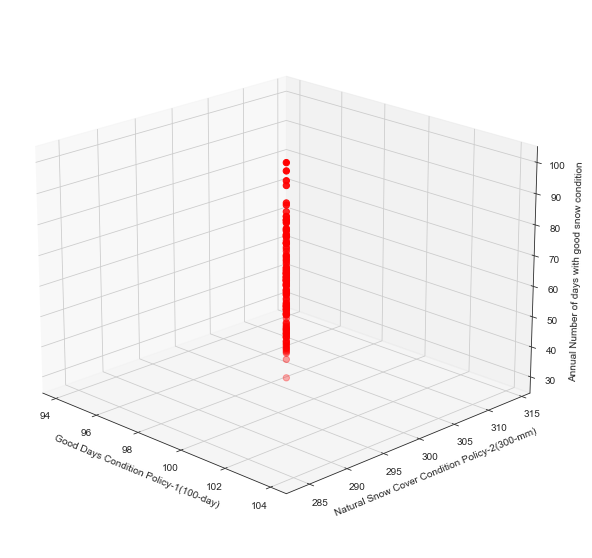

In [60]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xGoodDays, x1SnowThershold, YY, s = 40, c='r', marker='o')

ax.set_xlabel('Good Days Condition Policy-1(100-day)')
ax.set_ylabel('Natural Snow Cover Condition Policy-2(300-mm)')
ax.set_zlabel('Annual Number of days with good snow condition')


#ax.scatter(100, 300, 40, color='green')


#x = np.linspace(75,100,5)
#y = np.linspace(220,300,16)
#X,Y = np.meshgrid(x,y)
#Z= X + Y -X - Y + 40 
#surf = ax.plot_surface(X, Y, Z, alpha = 0.2)
ax.view_init(20, -45)

fig.savefig(os.path.join(rootVisualization, 'SA_Policy_All.svg'), format='svg', dpi=300)
plt.show()

### Defining the Q0.9 and Q0.1 databases

In [61]:
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)

#2020/08/23
print(q10_years_fin[0])
print(q25_years_fin[0])
print(q50_years_fin[0])
print(q75_years_fin[0])
print(q90_years_fin[0])
print(q50_years_fin.shape)

print(q10_years_Art[0])
print(q25_years_Art[0])
print(q50_years_Art[0])
print(q75_years_Art[0])
print(q90_years_Art[0])
print(q50_years_Art.shape)

print(q10_years_Like[0])
print(q25_years_Like[0])
print(q50_years_Like[0])
print(q75_years_Like[0])
print(q90_years_Like[0])
print(q50_years_Like.shape)

[22.82163172]
[39.51644661]
[62.37201136]
[81.98054259]
[106.846943]
(118, 1)
[0.765]
[1.3125]
[2.205]
[2.875]
[3.974]
(118, 1)
[53.115]
[60.1775]
[66.065]
[77.0475]
[86.494]
(118, 1)
[23.04953611]
[39.91107096]
[62.99487897]
[82.79922749]
[100.]
(118, 1)


In [62]:
print("#########")
print(matrix_GoodDays26.shape)
print(matrix_GoodDays45.shape)
print(matrix_GoodDays85.shape)
print(len(matrix_GoodDays26) + len(matrix_GoodDays45) + len(matrix_GoodDays85))
print("#########")
print(matrix_fin26.shape)
print(matrix_fin45.shape)
print(matrix_fin85.shape)
print(len(matrix_fin26) + len(matrix_fin45) + len(matrix_fin85))
print("#########")
print(matrix_Art26.shape)
print(matrix_Art45.shape)
print(matrix_Art85.shape)
print(len(matrix_Art26) + len(matrix_Art45) + len(matrix_Art85))
print("#########")
print(matrix_Like26.shape)
print(matrix_Like45.shape)
print(matrix_Like85.shape)
print(len(matrix_Like26) + len(matrix_Like45) + len(matrix_Like85))

#########
(50, 119, 2)
(50, 119, 2)
(50, 119, 2)
150
#########
(50, 119, 2)
(50, 119, 2)
(50, 119, 2)
150
#########
(50, 119, 2)
(50, 119, 2)
(50, 119, 2)
150
#########
(50, 119, 2)
(50, 119, 2)
(50, 119, 2)
150


In [64]:
print(matrix_GoodDays[:, :, 1:2].shape)
print(matrix_GoodDays[140, 0, 1:2])
print(matrix_GoodDays[143].shape)

(150, 119, 1)
['isOverSnow_sc_Ver2_26_7']
(119, 2)


## Analysis for different RCP2.6, RCP4.5, and RCP8.5
### Calculate quantiles for each RCP scenarios

In [65]:
q10_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.9, axis=0)



#2020/08/13
q10_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.9, axis=0)


q10_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.9, axis=0)


#### Make dataframes from quantiles

In [66]:
dfq50_26 = pd.DataFrame(q50_years_26)
dfq50_26.columns = ['median26']
dfq50_45 = pd.DataFrame(q50_years_45)
dfq50_45.columns = ['median45']
dfq50_85 = pd.DataFrame(q50_years_85)
dfq50_85.columns = ['median85']

dfq90_26 = pd.DataFrame(q90_years_26)
dfq90_26.columns = ['Q90_26']
dfq90_45 = pd.DataFrame(q90_years_45)
dfq90_45.columns = ['Q90_45']
dfq90_85 = pd.DataFrame(q90_years_85)
dfq90_85.columns = ['Q90_85']

dfq10_26 = pd.DataFrame(q10_years_26)
dfq10_26.columns = ['Q10_26']
dfq10_45 = pd.DataFrame(q10_years_45)
dfq10_45.columns = ['Q10_45']
dfq10_85 = pd.DataFrame(q10_years_85)
dfq10_85.columns = ['Q10_85']

### 2020/08/13
dfq50_fin_26 = pd.DataFrame(q50_years_fin_26)
dfq50_fin_26.columns = ['median26']
dfq50_fin_45 = pd.DataFrame(q50_years_fin_45)
dfq50_fin_45.columns = ['median45']
dfq50_fin_85 = pd.DataFrame(q50_years_fin_85)
dfq50_fin_85.columns = ['median85']

dfq90_fin_26 = pd.DataFrame(q90_years_fin_26)
dfq90_fin_26.columns = ['median26']
dfq90_fin_45 = pd.DataFrame(q90_years_fin_45)
dfq90_fin_45.columns = ['median45']
dfq90_fin_85 = pd.DataFrame(q90_years_fin_85)
dfq90_fin_85.columns = ['median85']

dfq10_fin_26 = pd.DataFrame(q10_years_fin_26)
dfq10_fin_26.columns = ['median26']
dfq10_fin_45 = pd.DataFrame(q10_years_fin_45)
dfq10_fin_45.columns = ['median45']
dfq10_fin_85 = pd.DataFrame(q10_years_fin_85)
dfq10_fin_85.columns = ['median85']

dfq50_Art_26 = pd.DataFrame(q50_years_Art_26)
dfq50_Art_26.columns = ['median26']
dfq50_Art_45 = pd.DataFrame(q50_years_Art_45)
dfq50_Art_45.columns = ['median45']
dfq50_Art_85 = pd.DataFrame(q50_years_Art_85)
dfq50_Art_85.columns = ['median85']

dfq90_Art_26 = pd.DataFrame(q90_years_Art_26)
dfq90_Art_26.columns = ['median26']
dfq90_Art_45 = pd.DataFrame(q90_years_Art_45)
dfq90_Art_45.columns = ['median45']
dfq90_Art_85 = pd.DataFrame(q90_years_Art_85)
dfq90_Art_85.columns = ['median85']

dfq10_Art_26 = pd.DataFrame(q10_years_Art_26)
dfq10_Art_26.columns = ['median26']
dfq10_Art_45 = pd.DataFrame(q10_years_Art_45)
dfq10_Art_45.columns = ['median45']
dfq10_Art_85 = pd.DataFrame(q10_years_Art_85)
dfq10_Art_85.columns = ['median85']

dfq50_Like_26 = pd.DataFrame(q50_years_Like_26)
dfq50_Like_26.columns = ['median26']
dfq50_Like_45 = pd.DataFrame(q50_years_Like_45)
dfq50_Like_45.columns = ['median45']
dfq50_Like_85 = pd.DataFrame(q50_years_Like_85)
dfq50_Like_85.columns = ['median85']

dfq90_Like_26 = pd.DataFrame(q90_years_Like_26)
dfq90_Like_26.columns = ['median26']
dfq90_Like_45 = pd.DataFrame(q90_years_Like_45)
dfq90_Like_45.columns = ['median45']
dfq90_Like_85 = pd.DataFrame(q90_years_Like_85)
dfq90_Like_85.columns = ['median85']

dfq10_Like_26 = pd.DataFrame(q10_years_Like_26)
dfq10_Like_26.columns = ['median26']
dfq10_Like_45 = pd.DataFrame(q10_years_Like_45)
dfq10_Like_45.columns = ['median45']
dfq10_Like_85 = pd.DataFrame(q10_years_Like_85)
dfq10_Like_85.columns = ['median85']

In [67]:
dfq50_26.head()

median26
0  68.738411
1  90.907964
2  85.015642
3  64.863113
4  92.102804

In [68]:
dfAllAverages = pd.concat((dfq50_26, dfq50_45, dfq50_85), axis=1)
dfAllAverages_Q90 = pd.concat((dfq90_26, dfq90_45, dfq90_85), axis=1)
dfAllAverages_Q10 = pd.concat((dfq10_26, dfq10_45, dfq10_85), axis=1)

dfAllAverages_fin = pd.concat((dfq50_fin_26, dfq50_fin_45, dfq50_fin_85), axis=1)
dfAllAverages_Q90_fin = pd.concat((dfq90_fin_26, dfq90_fin_45, dfq90_fin_85), axis=1)
dfAllAverages_Q10_fin = pd.concat((dfq10_fin_26, dfq10_fin_45, dfq10_fin_85), axis=1)

dfAllAverages_Art = pd.concat((dfq50_Art_26, dfq50_Art_45, dfq50_Art_85), axis=1)
dfAllAverages_Q90_Art = pd.concat((dfq90_Art_26, dfq90_Art_45, dfq90_Art_85), axis=1)
dfAllAverages_Q10_Art = pd.concat((dfq10_Art_26, dfq10_Art_45, dfq10_Art_85), axis=1)

dfAllAverages_Like = pd.concat((dfq50_Like_26, dfq50_Like_45, dfq50_Like_85), axis=1)
dfAllAverages_Q90_Like = pd.concat((dfq90_Like_26, dfq90_Like_45, dfq90_Like_85), axis=1)
dfAllAverages_Q10_Like = pd.concat((dfq10_Like_26, dfq10_Like_45, dfq10_Like_85), axis=1)

In [69]:
dfAllAverages.head()

median26    median45    median85
0  68.738411   51.453600   64.411804
1  90.907964   88.351703   79.125001
2  85.015642   97.396100  108.559326
3  64.863113   71.928471   73.055838
4  92.102804  102.678389  106.567584

In [70]:
print('*** All RCPs***')
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)
print('*** RCP2.6***')
print(q10_years_26[0])
print(q25_years_26[0])
print(q50_years_26[0])
print(q75_years_26[0])
print(q90_years_26[0])
print(q50_years_26.shape)
print('*** RCP4.5***')
print(q10_years_45[0])
print(q25_years_45[0])
print(q50_years_45[0])
print(q75_years_45[0])
print(q90_years_45[0])
print(q50_years_45.shape)
print('*** RCP8.5***')
print(q10_years_85[0])
print(q25_years_85[0])
print(q50_years_85[0])
print(q75_years_85[0])
print(q90_years_85[0])
print(q50_years_85.shape)

*** All RCPs***
[22.82163172]
[39.51644661]
[62.37201136]
[81.98054259]
[106.846943]
(118, 1)
*** RCP2.6***
[36.54725333]
[43.71183906]
[68.73841138]
[86.13984797]
[107.18021731]
(118, 1)
*** RCP4.5***
[15.88196011]
[34.87979946]
[51.45360049]
[74.4462346]
[101.09002958]
(118, 1)
*** RCP8.5***
[26.10901316]
[37.75243072]
[64.41180414]
[84.53724711]
[108.71860238]
(118, 1)


In [71]:
print('*** All RCPs***')
print(q10_years_fin[0])
print(q25_years_fin[0])
print(q50_years_fin[0])
print(q75_years_fin[0])
print(q90_years_fin[0])
print(q50_years_fin.shape)
print('*** RCP2.6***')
print(q10_years_fin_26[0])
print(q25_years_fin_26[0])
print(q50_years_fin_26[0])
print(q75_years_fin_26[0])
print(q90_years_fin_26[0])
print(q50_years_fin_26.shape)
print('*** RCP4.5***')
print(q10_years_fin_45[0])
print(q25_years_fin_45[0])
print(q50_years_fin_45[0])
print(q75_years_fin_45[0])
print(q90_years_fin_45[0])
print(q50_years_fin_45.shape)
print('*** RCP8.5***')
print(q10_years_fin_85[0])
print(q25_years_fin_85[0])
print(q50_years_fin_85[0])
print(q75_years_fin_85[0])
print(q90_years_fin_85[0])
print(q50_years_fin_85.shape)

*** All RCPs***
[0.765]
[1.3125]
[2.205]
[2.875]
[3.974]
(118, 1)
*** RCP2.6***
[1.236]
[1.5]
[2.29]
[3.075]
[4.091]
(118, 1)
*** RCP4.5***
[0.475]
[1.095]
[1.845]
[2.6125]
[3.686]
(118, 1)
*** RCP8.5***
[0.935]
[1.2975]
[2.205]
[2.935]
[3.996]
(118, 1)


### RCP 2.6 Number of days with Good Snow Condition over the time

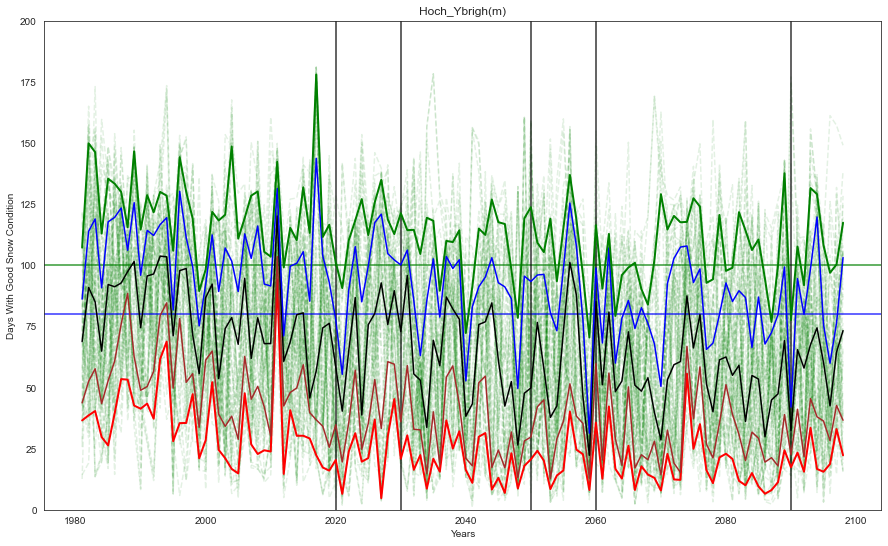

In [74]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)

for i in range(0, len(matrix_GoodDays26), 1):
    a = matrix_GoodDays26[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.11)

axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_26, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_26, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_26, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_26, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_26, color='green', linewidth = 2, alpha=1)

axs.set_ylim(bottom=0, top =200)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP26.svg'), format='svg', dpi=300)
plt.show()

### RCP 4.5 Number of days with Good Snow Condition over the time

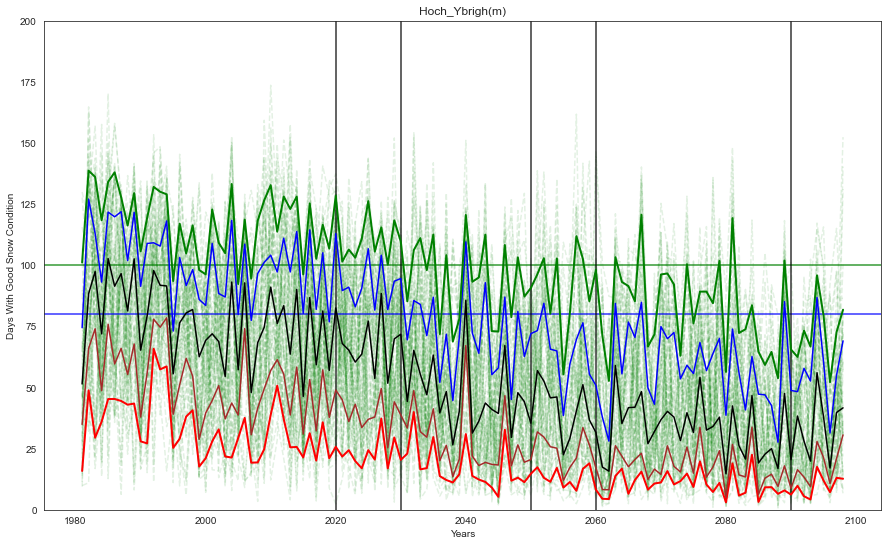

In [76]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)

for i in range(0, len(matrix_GoodDays45), 1):
    a = matrix_GoodDays45[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.11)

axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_45, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_45, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_45, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_45, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_45, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=0, top =200)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP45.svg'), format='svg', dpi=300)

plt.show()

### RCP 8.5 Number of days with Good Snow Condition over the time

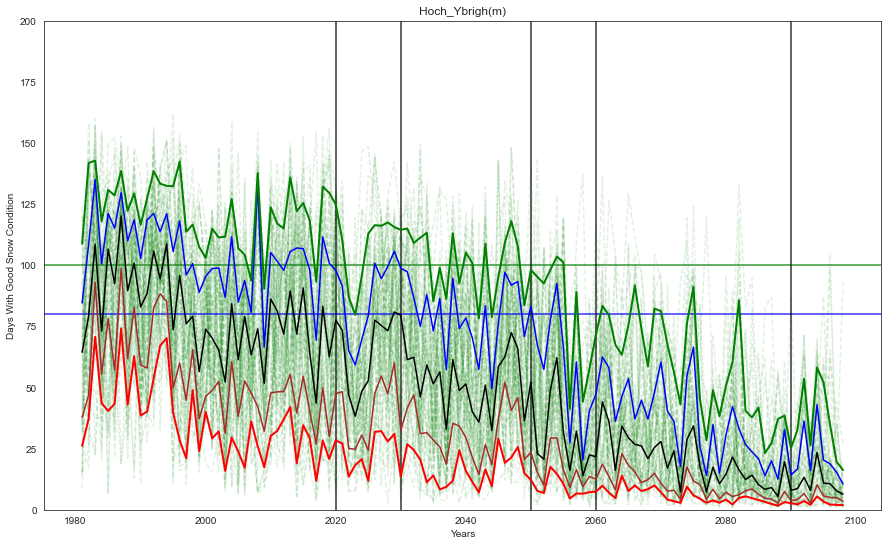

In [77]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_GoodDays85), 1):
    a = matrix_GoodDays85[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.11)


axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_85, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_85, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_85, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_85, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_85, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=0, top =200)
axs.set_title('Hoch_Ybrigh(m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP45.svg'), format='svg', dpi=300)

plt.show()

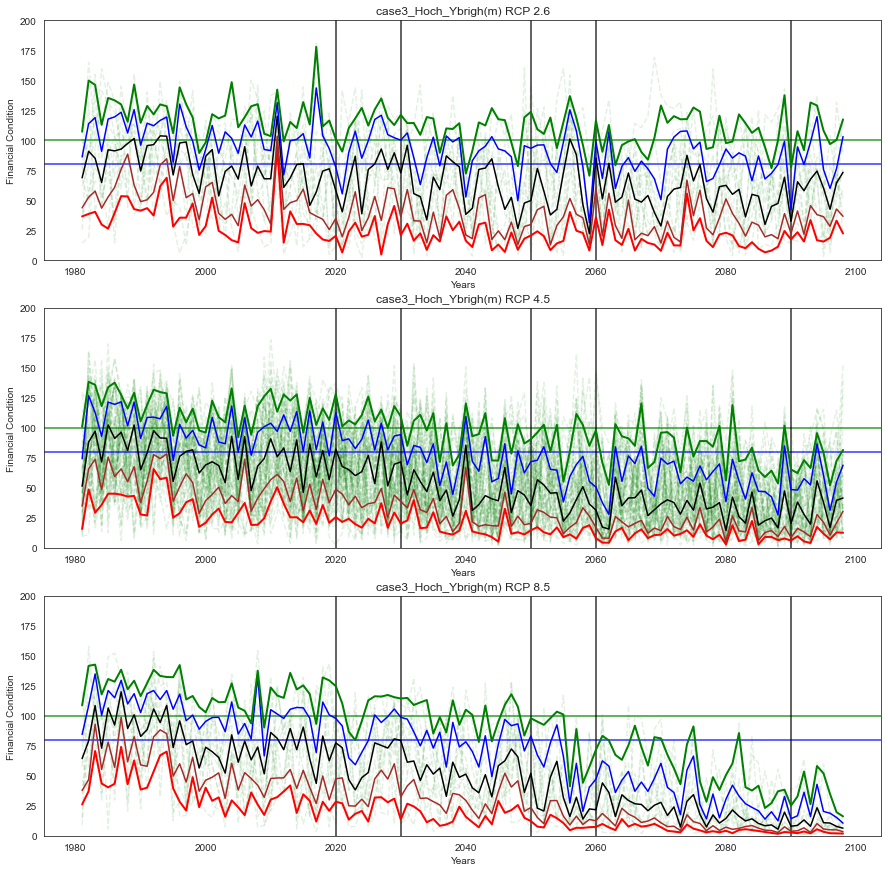

In [79]:
fig, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_GoodDays26), 5):
    a = matrix_GoodDays26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.11)


for i in range(0, len(matrix_GoodDays45), 1):
    a = matrix_GoodDays45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.11)


for i in range(0, len(matrix_GoodDays85), 5):
    a = matrix_GoodDays85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.11)    


axs[0].axhline(y=100, color='green', alpha=0.8)
axs[0].axhline(y=80, color='blue', alpha=0.8)
axs[1].axhline(y=100, color='green', alpha=0.8)
axs[1].axhline(y=80, color='blue', alpha=0.8)
axs[2].axhline(y=100, color='green', alpha=0.8)
axs[2].axhline(y=80, color='blue', alpha=0.8)



axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='black', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='black', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='black', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)



axs[0].plot(x_axis, q10_years_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_26, color='brown',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_26, color='green', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_45, color='brown',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_45, color='green', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_85, color='brown',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_85, color='green', linewidth = 2, alpha=1)

axs[0].set_ylim(bottom=0, top =200)
axs[0].set_title('case3_Hoch_Ybrigh(m) RCP 2.6')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Financial Condition')

axs[1].set_ylim(bottom=0, top =200)
axs[1].set_title('case3_Hoch_Ybrigh(m) RCP 4.5')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Financial Condition')

axs[2].set_ylim(bottom=0, top =200)
axs[2].set_title('case3_Hoch_Ybrigh(m) RCP 8.5')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Financial Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP26_45_85_GoodDays.svg'), format='svg', dpi=300)
plt.show()

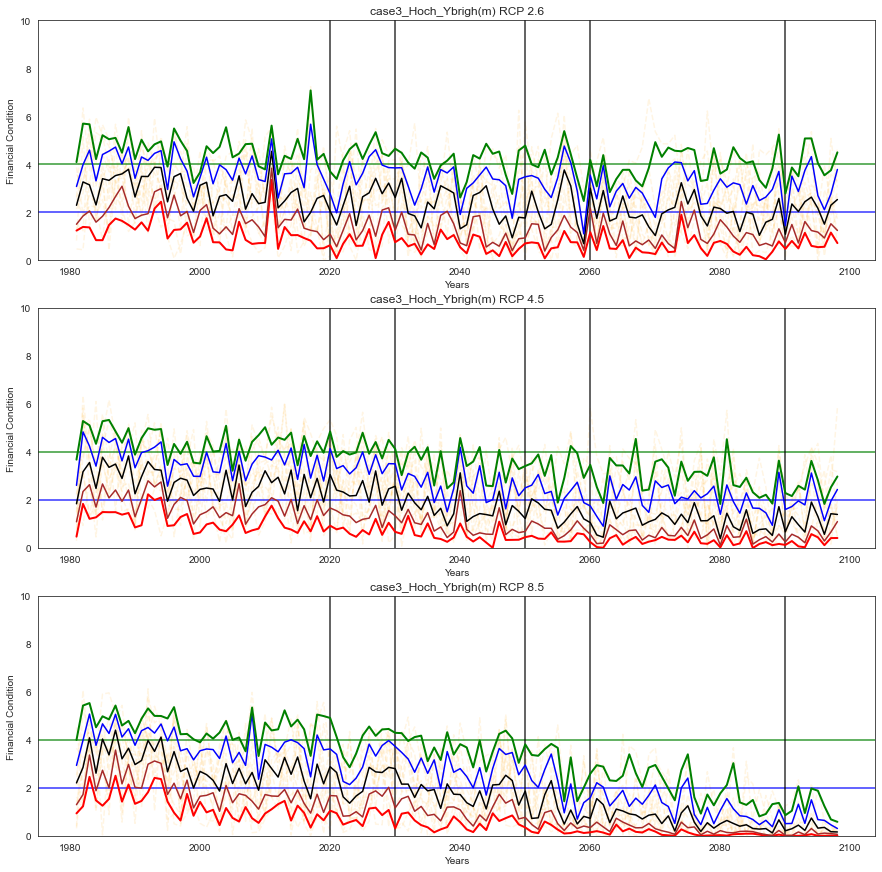

In [80]:
fig, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_fin26), 5):
    a = matrix_fin26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=0.11)


for i in range(0, len(matrix_fin45), 5):
    a = matrix_fin45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=0.11)


for i in range(0, len(matrix_fin85), 5):
    a = matrix_fin85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=0.11)    


axs[0].axhline(y=4, color='green', alpha=0.8)
axs[0].axhline(y=2, color='blue', alpha=0.8)
axs[1].axhline(y=4, color='green', alpha=0.8)
axs[1].axhline(y=2, color='blue', alpha=0.8)
axs[2].axhline(y=4, color='green', alpha=0.8)
axs[2].axhline(y=2, color='blue', alpha=0.8)



axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='black', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='black', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='black', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)



axs[0].plot(x_axis, q10_years_fin_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_fin_26, color='brown',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_fin_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_fin_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_fin_26, color='green', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_fin_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_fin_45, color='brown',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_fin_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_fin_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_fin_45, color='green', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_fin_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_fin_85, color='brown',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_fin_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_fin_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_fin_85, color='green', linewidth = 2, alpha=1)

axs[0].set_ylim(bottom=0, top =10)
axs[0].set_title('case3_Hoch_Ybrigh(m) RCP 2.6')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Financial Condition')

axs[1].set_ylim(bottom=0, top =10)
axs[1].set_title('case3_Hoch_Ybrigh(m) RCP 4.5')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Financial Condition')

axs[2].set_ylim(bottom=0, top =10)
axs[2].set_title('case3_Hoch_Ybrigh(m) RCP 8.5')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Financial Condition')


fig.savefig(os.path.join(rootVisualization, 'RCP26_45_85_Financial.svg'), format='svg', dpi=300)

plt.show()

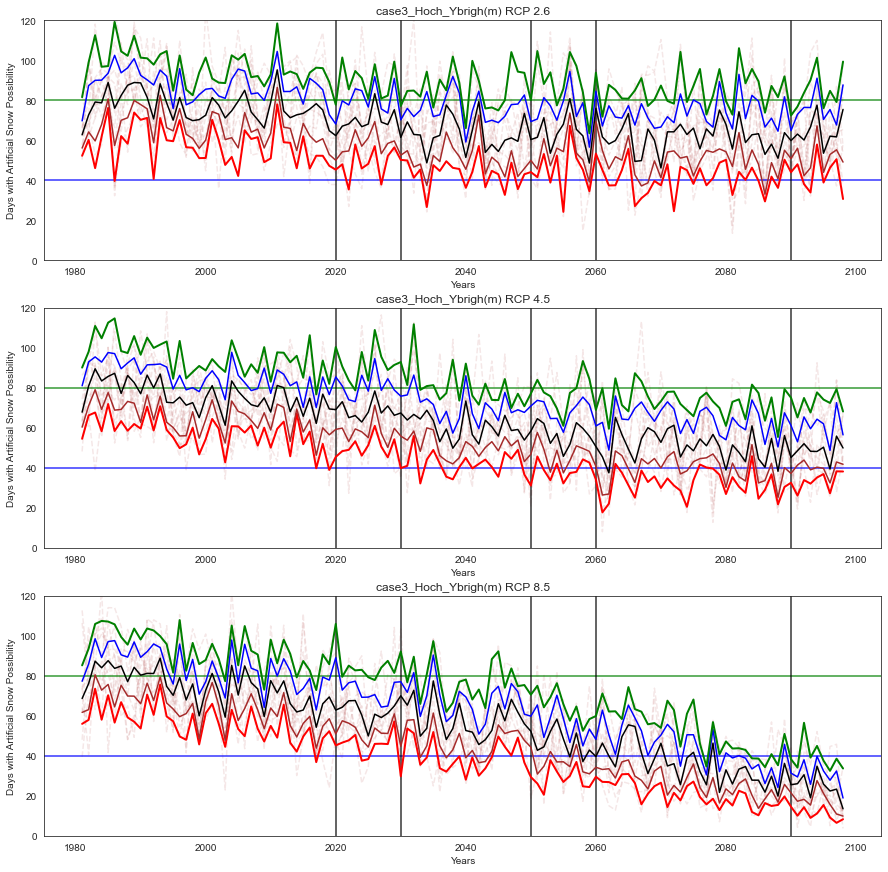

In [81]:
fig, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_Art26), 5):
    a = matrix_Art26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='brown', linestyle = '--', alpha=0.11)


for i in range(0, len(matrix_Art45), 5):
    a = matrix_Art45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='brown', linestyle = '--', alpha=0.11)


for i in range(0, len(matrix_Art85), 5):
    a = matrix_Art85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='brown', linestyle = '--', alpha=0.11)    


axs[0].axhline(y=80, color='green', alpha=0.8)
axs[0].axhline(y=40, color='blue', alpha=0.8)
axs[1].axhline(y=80, color='green', alpha=0.8)
axs[1].axhline(y=40, color='blue', alpha=0.8)
axs[2].axhline(y=80, color='green', alpha=0.8)
axs[2].axhline(y=40, color='blue', alpha=0.8)



axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='black', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='black', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='black', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)



axs[0].plot(x_axis, q10_years_Art_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_Art_26, color='brown',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_Art_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_Art_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_Art_26, color='green', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_Art_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_Art_45, color='brown',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_Art_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_Art_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_Art_45, color='green', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_Art_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_Art_85, color='brown',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_Art_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_Art_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_Art_85, color='green', linewidth = 2, alpha=1)

axs[0].set_ylim(bottom=0, top =120)
axs[0].set_title('case3_Hoch_Ybrigh(m) RCP 2.6')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Days with Artificial Snow Possibility')

axs[1].set_ylim(bottom=0, top =120)
axs[1].set_title('case3_Hoch_Ybrigh(m) RCP 4.5')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Days with Artificial Snow Possibility')

axs[2].set_ylim(bottom=0, top =120)
axs[2].set_title('case3_Hoch_Ybrigh(m) RCP 8.5')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Days with Artificial Snow Possibility')


fig.savefig(os.path.join(rootVisualization, 'RCP26_45_85_ArtificialSnow.svg'), format='svg', dpi=300)

plt.show()

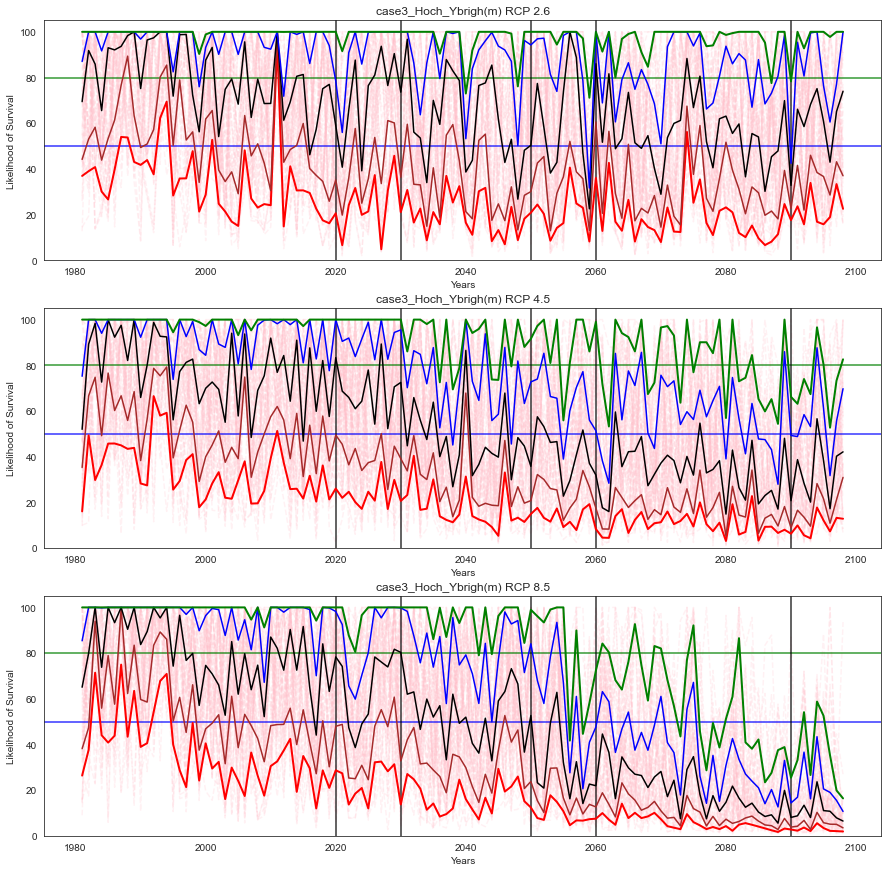

In [84]:
fig, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_Like26), 1):
    a = matrix_Like26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='pink', linestyle = '--', alpha=0.21)


for i in range(0, len(matrix_Like45), 1):
    a = matrix_Like45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='pink', linestyle = '--', alpha=0.21)


for i in range(0, len(matrix_Like85), 1):
    a = matrix_Like85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='pink', linestyle = '--', alpha=0.21)    


axs[0].axhline(y=80, color='green', alpha=0.8)
axs[0].axhline(y=50, color='blue', alpha=0.8)
axs[1].axhline(y=80, color='green', alpha=0.8)
axs[1].axhline(y=50, color='blue', alpha=0.8)
axs[2].axhline(y=80, color='green', alpha=0.8)
axs[2].axhline(y=50, color='blue', alpha=0.8)



axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='black', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='black', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='black', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)



axs[0].plot(x_axis, q10_years_Like_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_Like_26, color='brown',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_Like_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_Like_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_Like_26, color='green', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_Like_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_Like_45, color='brown',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_Like_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_Like_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_Like_45, color='green', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_Like_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_Like_85, color='brown',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_Like_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_Like_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_Like_85, color='green', linewidth = 2, alpha=1)

axs[0].set_ylim(bottom=0, top =105)
axs[0].set_title('case3_Hoch_Ybrigh(m) RCP 2.6')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Likelihood of Survival')

axs[1].set_ylim(bottom=0, top =105)
axs[1].set_title('case3_Hoch_Ybrigh(m) RCP 4.5')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Likelihood of Survival')

axs[2].set_ylim(bottom=0, top =105)
axs[2].set_title('case3_Hoch_Ybrigh(m) RCP 8.5')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Likelihood of Survival')


fig.savefig(os.path.join(rootVisualization, 'RCP26_45_85_Likelihood_Survival.svg'), format='svg', dpi=300)

plt.show()

In [85]:
dfAllAverages.head()

median26    median45    median85
0  68.738411   51.453600   64.411804
1  90.907964   88.351703   79.125001
2  85.015642   97.396100  108.559326
3  64.863113   71.928471   73.055838
4  92.102804  102.678389  106.567584

### Worst Case: Quantile 0.10 >> 90% of the scenarios satisfy this condition

In [86]:
y_axis = np.arange(1981, 2100, step= 20)

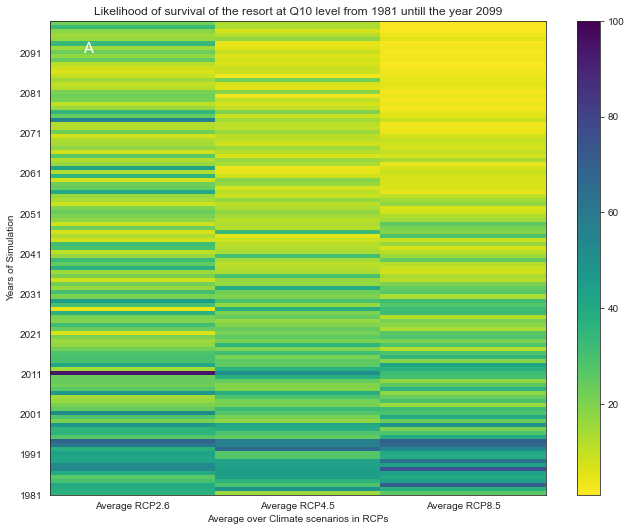

In [87]:
from matplotlib.ticker import FuncFormatter


fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c3 = ax3.pcolor(dfAllAverages_Q10, cmap='viridis_r', vmin=1, vmax=100)
cb3 = fig.colorbar(c3)

#xticks(np.arange(0, 4, step=1))
ax3.set_title('default: no edges')


ax3.set_xlabel("Average over Climate scenarios in RCPs")

ax3.set_ylabel("Years of Simulation")
plt.xticks(x_axis, ('Average RCP2.6', 'Average RCP4.5', 'Average RCP8.5'))
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
plt.title("Likelihood of survival of the resort at Q10 level from {} untill the year {}".format(1981, 2099))

ax3.text(0.2, 110, 'A', color = 'white', fontsize=15)

fig.savefig(os.path.join(rootVisualization, 'Likelihood_All.svg'), format='svg', dpi=300)


fig.tight_layout()
plt.show()

### Median Case: Quantile 0.5 >> 50 % of the scenarios satisfy this condition

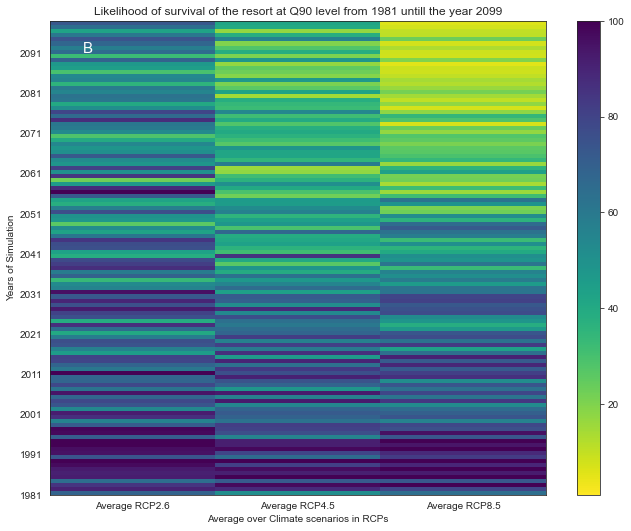

In [88]:
from matplotlib.ticker import FuncFormatter


fig, (ax4) = plt.subplots(1, 1, figsize=(9.5,7.5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c4 = ax4.pcolor(dfAllAverages, cmap='viridis_r' ,vmin=1, vmax=100)
cb4 = fig.colorbar(c4)

#xticks(np.arange(0, 4, step=1))
ax4.set_title('default: no edges')


ax4.set_xlabel("Average over Climate scenarios in RCPs")

ax4.set_ylabel("Years of Simulation")
plt.xticks(x_axis, ('Average RCP2.6', 'Average RCP4.5', 'Average RCP8.5'))
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
plt.title("Likelihood of survival of the resort at Q90 level from {} untill the year {}".format(1981, 2099))

ax4.text(0.2, 110, 'B', color = 'white', fontsize=15)


fig.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q90.svg'), format='svg', dpi=300)


fig.tight_layout()
plt.show()

### Best Case: Quantile 0.9 >> Only 10 % of the scenarios satisfy this condition

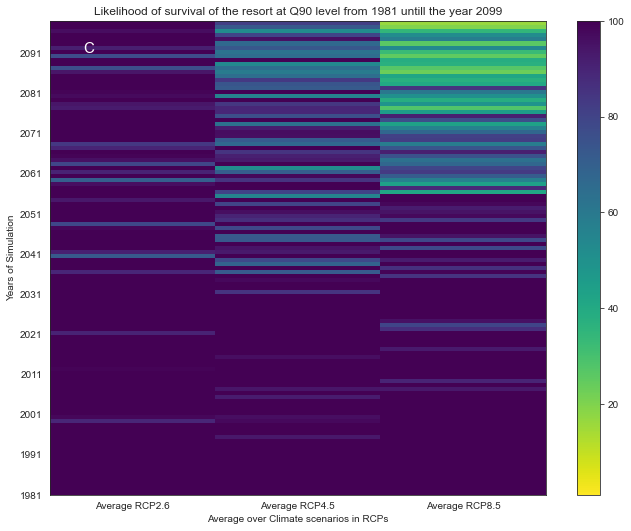

In [89]:
from matplotlib.ticker import FuncFormatter


fig, (ax4) = plt.subplots(1, 1, figsize=(9.5,7.5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c4 = ax4.pcolor(dfAllAverages_Q90, cmap='viridis_r' ,vmin=1, vmax=100)
cb4 = fig.colorbar(c4)

#xticks(np.arange(0, 4, step=1))
ax4.set_title('default: no edges')


ax4.set_xlabel("Average over Climate scenarios in RCPs")

ax4.set_ylabel("Years of Simulation")
plt.xticks(x_axis, ('Average RCP2.6', 'Average RCP4.5', 'Average RCP8.5'))
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
plt.title("Likelihood of survival of the resort at Q90 level from {} untill the year {}".format(1981, 2099))

ax4.text(0.2, 110, 'C', color = 'white', fontsize=15)


fig.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q90.svg'), format='svg', dpi=300)


fig.tight_layout()
plt.show()

### Making dataframes for all RCP2.6 , RCP4.5, and RCP8.5 scenarios

In [90]:
print(matrix_GoodDays26.shape)
print(matrix_GoodDays45.shape)
print(matrix_GoodDays85.shape)
print(matrix_GoodDays.shape)

(50, 119, 2)
(50, 119, 2)
(50, 119, 2)
(150, 119, 2)


In [91]:
pd.DataFrame((matrix_GoodDays26[0][1:,0:1]), columns=matrix_GoodDays26[0,0,0:1]).head()

Season
0  1981-1982
1  1982-1983
2  1983-1984
3  1984-1985
4  1985-1986

In [92]:
df26_all = pd.DataFrame((matrix_GoodDays26[0][1:,0:1]), columns=matrix_GoodDays26[0,0,0:1])
for i in range(len(matrix_GoodDays26)):
    #b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=matrix_GoodDays26[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays26[i,0,1:])])
    df26_all = pd.concat((df26_all, b), axis = 1)

In [93]:
df26_all.head(7)

Season sc_1_['isOverSnow_sc_Ver1_26_7']  \
0  1981-1982               101.28500979132878   
1  1982-1983                 86.9879427593171   
2  1983-1984               120.41434724623146   
3  1984-1985               111.74137123492058   
4  1985-1986               148.42372766369184   
5  1986-1987               133.07787594947797   
6  1987-1988                 91.4689697920226   

  sc_2_['isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP26-pcp']  \
0                                  87.43835456347615     
1                                    146.45974958037     
2                                 110.64137631056539     
3                                 123.53643811434796     
4                                  52.63935080725501     
5                                  92.21523467810096     
6                                  133.0237825335687     

  sc_3_['isOverSnow_sc_Ver1_26_9'] sc_4_['isOverSnow_sc_Ver2_26_2']  \
0               106.91977352387316                 69.3875835432344   
1                55.36422296167721               52.780298234475644   
2               59.389883409678035                68.77731821454057   
3                46.50797056539315                65.75575256390361   
4                89.35218528988071               108.70615742298024   
5               103.36383560446114                 79.8553094295901   
6               56.652242701017244                148.0933040157922   

  sc_5_['isOverSnow_sc_Ver2_26_6']  \
0                 88.2874157136474   
1                52.45965621016984   
2               25.046585151664768   
3               62.525228171172046   
4               20.470641342171685   
5                145.2719426521005   
6                70.82631619923367   

  sc_6_['isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp']  \
0                                  44.25999951374659        
1                                   34.5657518113164        
2                                 142.53082276294649        
3                                 44.134397169328246        
4                                  89.47839287823055        
5                                  33.00657104501767        
6                                 127.24252863297508        

  sc_7_['isOverSnow_sc_Ver2_26_3']  \
0                56.85714239003688   
1               115.29395908832826   
2                40.65009385818313   
3               18.915906972414774   
4                59.48187781994003   
5                43.52834997752188   
6                 31.5429376570388   

  sc_8_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  43.02209597125959     
1                                 136.00320021938634     
2                                  59.45581043208765     
3                                  75.92479518127385     
4                                  53.12444264050236     
5                                  99.31697035594523     
6                                   93.2098775694265     

  sc_9_['isOverSnow_MPICSC-REMO2-MPIESM-EUR11-RCP26-pcp']  \
0                                 35.892650147745826        
1                                  41.80244605668115        
2                                 38.112672421129474        
3                                  83.21815243290372        
4                                 119.43765593559542        
5                                  38.78177152179209        
6                                 61.254037174889774        

  sc_10_['isOverSnow_sc_Ver1_26_10']  \
0                  69.70104355862203   
1                 103.53387543470178   
2                 13.566123006879074   
3                  19.82414197130062   
4                  37.94193748023392   
5                  90.37059916484435   
6                 50.512736292802686   

  sc_11_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  25.61789695996012      
1                                 131.86597752971107      
2                           

In [94]:
matrix_GoodDays45[2,0,1:]

array(['isOverSnow_SMHI-RCA-IPSL-EUR44-RCP45-pcp'], dtype='<U47')

In [95]:
df45_all = pd.DataFrame((matrix_GoodDays45[0][1:,0:1]), columns=matrix_GoodDays45[0,0,0:1])
for i in range(len(matrix_GoodDays45)):
    #b = pd.DataFrame(matrix_GoodDays45[i][1:,1:], columns=matrix_GoodDays45[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays45[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays45[i,0,1:])])

    df45_all = pd.concat((df45_all, b), axis = 1)

In [96]:
df45_all.head(7)

Season sc_1_['isOverSnow_sc_Ver1_45_6']  \
0  1981-1982                88.67002830093361   
1  1982-1983                85.51552148463615   
2  1983-1984                28.05117910958675   
3  1984-1985                56.11285572679852   
4  1985-1986               125.35232362781527   
5  1986-1987               119.87900432667671   
6  1987-1988               44.630989456789116   

  sc_2_['isOverSnow_SMHI-RCA-GFDL-EUR44-RCP45-pcp']  \
0                                39.233498665199335   
1                                100.03686813343722   
2                                37.792899617200305   
3                                 82.02965265171883   
4                                122.45473948664906   
5                                   59.415926589423   
6                                  45.7557271925537   

  sc_3_['isOverSnow_SMHI-RCA-IPSL-EUR44-RCP45-pcp']  \
0                                 89.77344130389233   
1                                 76.17362622985141   
2                                 29.52908777067358   
3                                 93.56622449227864   
4                                150.45140554105092   
5                                 69.01422573489796   
6                                17.455650171283477   

  sc_4_['isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp']  \
0                                   37.0374133837251        
1                                  36.83939829562553        
2                                 31.452906484955037        
3                                  72.34779193502547        
4                                 109.43670486745114        
5                                  55.25209353309607        
6                                 56.842833685375915        

  sc_5_['isOverSnow_sc_Ver1_45_18'] sc_6_['isOverSnow_sc_Ver2_45_16']  \
0                26.723946457627843                 65.31900275621618   
1                 164.6945693460338                 91.01268904670484   
2                100.89398396138341                36.464162545358924   
3                  53.6882657809379                 85.41553579747573   
4                 81.42829742725554                 98.86218825554485   
5                 60.21550904123416                 71.50962947111458   
6                 93.81384391724892                 117.8540609122005   

  sc_7_['isOverSnow_sc_Ver2_45_12'] sc_8_['isOverSnow_sc_Ver1_45_5']  \
0                 75.59048310029344                46.35197893934681   
1                 79.13800202957933                72.98288538512578   
2                 81.61501956116898               109.72191290786341   
3                 44.31489412368401               112.58328264448416   
4                 37.05235728789202               122.91689839657076   
5                 98.00931131036407               141.92092633082856   
6                 64.45933802879564                93.49705460923322   

  sc_9_['isOverSnow_SMHI-RCA-MPIESM-EUR11-RCP45-pcp']  \
0                                 46.289328209125884    
1                                  43.52584261105094    
2                                 134.69216575020016    
3                                  70.27282340865858    
4                                 110.29815761508213    
5                                 38.385707914040026    
6                                  128.9022668988128    

  sc_10_['isOverSnow_sc_Ver1_45_22'] sc_11_['isOverSnow_sc_Ver2_45_5']  \
0                   66.6806030446036                11.420820254329879   
1                 129.99326531444342                142.95581387369336   
2                  85.59828188932454                 72.04589925070634   
3                  86.96095198740626                  39.6367166252819   
4                 60.628689604094546                113.61697817387535   
5                  55.11285111507569                 76.97103563072103   
6                   96.1734694312766                 97.52548871288602   

  sc_12_['isOverSnow_sc_Ver2_4

In [97]:
df85_all = pd.DataFrame((matrix_GoodDays85[0][1:,0:1]), columns=matrix_GoodDays85[0,0,0:1])
for i in range(len(matrix_GoodDays85)):
    #b = pd.DataFrame(matrix_GoodDays85[i][1:,1:], columns=matrix_GoodDays85[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays85[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays85[i,0,1:])])

    df85_all = pd.concat((df85_all, b), axis = 1)

In [98]:
df85_all.head(7)

Season sc_1_['isOverSnow_sc_Ver2_85_17']  \
0  1981-1982                 8.892258178806982   
1  1982-1983                 88.31116248917812   
2  1983-1984                 78.96812823510814   
3  1984-1985                 35.57204155499301   
4  1985-1986                 99.68418020701974   
5  1986-1987                127.71769592046942   
6  1987-1988                 80.04717311194757   

  sc_2_['isOverSnow_sc_Ver1_85_28']  \
0                60.843821647302455   
1                 98.68944282349874   
2                 97.45240617490339   
3                 55.89551720109615   
4                 108.5373234688798   
5                116.16273560379406   
6                120.37284022838517   

  sc_3_['isOverSnow_KNMI-RACMO-ECEARTH-EUR44-RCP85-pcp']  \
0                                 118.50644310064568       
1                                  98.59035743428471       
2                                 135.64190888892756       
3                                  69.29581970536273       
4                                 114.42569551359287       
5                                 100.01581200254824       
6                                 148.51488513563677       

  sc_4_['isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP85-pcp']  \
0                                 35.384289953647944        
1                                  34.14133824666603        
2                                 22.483387987289728        
3                                  71.16662173788797        
4                                 110.83634103964567        
5                                  55.12585598917173        
6                                  56.96462483275843        

  sc_5_['isOverSnow_CLMCOM-CCLM5-HADGEM-EUR44-RCP85-pcp']  \
0                                   66.2072791179931        
1                                  142.7183461046372        
2                                 109.41715778191669        
3                                  73.93653080585128        
4                                  133.8323015829554        
5                                 145.55726019686807        
6                                 113.61081064772718        

  sc_6_['isOverSnow_sc_Ver2_85_12']  \
0                119.91977928508939   
1                 57.27747730522772   
2                 98.41058906338407   
3                29.825291329775755   
4                 99.56030594416465   
5                 89.93184693995866   
6                 105.9539774647664   

  sc_7_['isOverSnow_CLMCOM-CCLM4-ECEARTH-EUR11-RCP85-pcp']  \
0                                  41.48364276778743         
1                                  151.2634095321471         
2                                  85.79927238563627         
3                                 152.86518324639252         
4                                 29.505184210317136         
5                                    88.825418159027         
6                                 104.77630489501327         

  sc_8_['isOverSnow_CLMCOM-CCLM4-MPIESM-EUR11-RCP85-pcp']  \
0                                 47.021412355538885        
1                                  84.09014879163848        
2                                 122.24779008621164        
3                                 110.47762278927033        
4                                  60.13149554868064        
5                                  75.91399678967218        
6                                 131.61672224388423        

  sc_9_['isOverSnow_sc_Ver2_85_11'] sc_10_['isOverSnow_sc_Ver1_85_15']  \
0                 71.67788471587593                 31.614614906555175   
1                 48.66687995999137                   75.3812984250296   
2                 49.17333455557138                  88.88219299613245   
3                24.597465669387287                  56.30826315376828   
4                 96.41662748879234                  32.38069894231433   
5                 21.03730616460754                 102.12320914902189   
6               

In [99]:
df26_all_Matrix = df26_all.to_numpy()
df45_all_Matrix = df45_all.to_numpy()
df85_all_Matrix = df85_all.to_numpy()

### Survival Map CH2018 RCP2.6

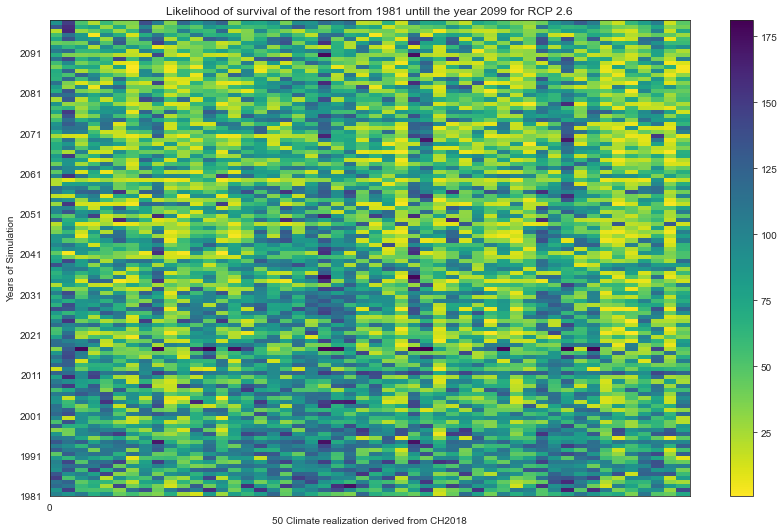

In [100]:
fig, (ax3) = plt.subplots(1, 1, figsize=(12,7.5))

Z = list(df26_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

c3 = ax3.pcolor(Z, cmap='viridis_r')
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, len(matrix_GoodDays26), step=100)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("{} Climate realization derived from CH2018".format(len(matrix_GoodDays26)))
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival of the resort from {} untill the year {} for RCP {}".format(1981, 2099, 2.6))

fig.tight_layout()
plt.show()

### Survival AMap CH2018 RCP4.5

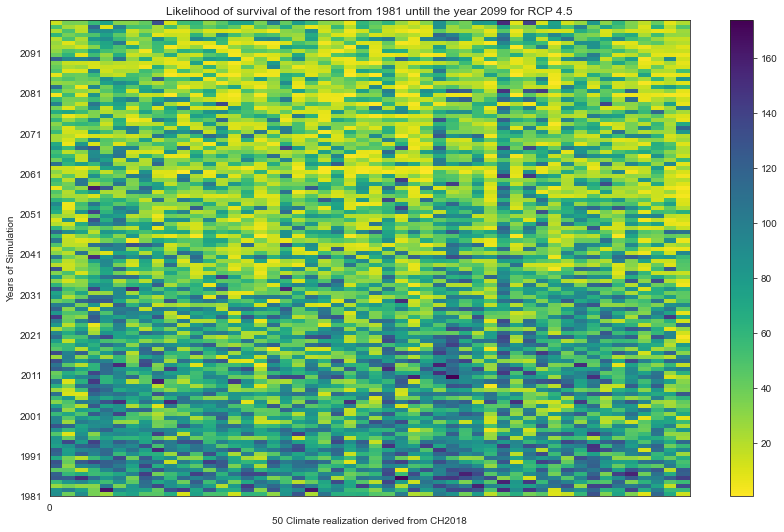

In [101]:
fig, (ax3) = plt.subplots(1, 1, figsize=(12,7.5))

Z = list(df45_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

#c3 = ax3.pcolor(Z)
c3 = ax3.pcolor(Z, cmap='viridis_r')
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, len(matrix_GoodDays45), step=100)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("{} Climate realization derived from CH2018".format(len(matrix_GoodDays45)))
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival of the resort from {} untill the year {} for RCP {}".format(1981, 2099, 4.5))

fig.tight_layout()
plt.show()

### Survival Map CH2018 RCP8.5

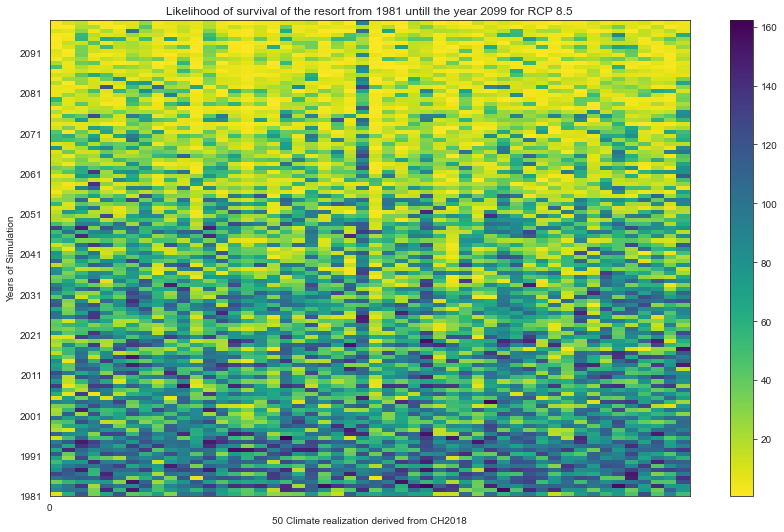

In [102]:
fig, (ax3) = plt.subplots(1, 1, figsize=(12,7.5))

Z = list(df85_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

#c3 = ax3.pcolor(Z)
c3 = ax3.pcolor(Z, cmap='viridis_r')

cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, len(matrix_GoodDays85), step=300)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("{} Climate realization derived from CH2018".format(len(matrix_GoodDays85)))
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival of the resort from {} untill the year {} for RCP {}".format(1981, 2099, 8.5))

fig.tight_layout()
plt.show()

## 3 years of not having good snow days

In [103]:
def tipping_points_freq(df):
    """
    This function, calculates the frequency of tipping points for each individual resort
    """
    dfColumns= df.columns
    
    scenarios_length= len(dfColumns)
    simulations_Length = len(df[dfColumns[1]])
    tipping_freq = np.zeros(scenarios_length)
    
    for i in range (1, scenarios_length, 1):
        m = 0
        for j in range (1 , simulations_Length, 1):
            #df26_all[df26_allColumns[1]].iloc[0]
            if float(df[dfColumns[i]].iloc[j]) < 100.0:
                m += 1
                if m == 3:
                    tipping_freq[i] += 1
                    m = 0
            else:
                #if m >= 3:
                #if m == 3:
                    #tipping_freq[i] += 1
                m = 0
                continue    
                #break
    return tipping_freq

In [104]:
df26_all.head()

Season sc_1_['isOverSnow_sc_Ver1_26_7']  \
0  1981-1982               101.28500979132878   
1  1982-1983                 86.9879427593171   
2  1983-1984               120.41434724623146   
3  1984-1985               111.74137123492058   
4  1985-1986               148.42372766369184   

  sc_2_['isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP26-pcp']  \
0                                  87.43835456347615     
1                                    146.45974958037     
2                                 110.64137631056539     
3                                 123.53643811434796     
4                                  52.63935080725501     

  sc_3_['isOverSnow_sc_Ver1_26_9'] sc_4_['isOverSnow_sc_Ver2_26_2']  \
0               106.91977352387316                 69.3875835432344   
1                55.36422296167721               52.780298234475644   
2               59.389883409678035                68.77731821454057   
3                46.50797056539315                65.75575256390361   
4                89.35218528988071               108.70615742298024   

  sc_5_['isOverSnow_sc_Ver2_26_6']  \
0                 88.2874157136474   
1                52.45965621016984   
2               25.046585151664768   
3               62.525228171172046   
4               20.470641342171685   

  sc_6_['isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp']  \
0                                  44.25999951374659        
1                                   34.5657518113164        
2                                 142.53082276294649        
3                                 44.134397169328246        
4                                  89.47839287823055        

  sc_7_['isOverSnow_sc_Ver2_26_3']  \
0                56.85714239003688   
1               115.29395908832826   
2                40.65009385818313   
3               18.915906972414774   
4                59.48187781994003   

  sc_8_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  43.02209597125959     
1                                 136.00320021938634     
2                                  59.45581043208765     
3                                  75.92479518127385     
4                                  53.12444264050236     

  sc_9_['isOverSnow_MPICSC-REMO2-MPIESM-EUR11-RCP26-pcp']  \
0                                 35.892650147745826        
1                                  41.80244605668115        
2                                 38.112672421129474        
3                                  83.21815243290372        
4                                 119.43765593559542        

  sc_10_['isOverSnow_sc_Ver1_26_10']  \
0                  69.70104355862203   
1                 103.53387543470178   
2                 13.566123006879074   
3                  19.82414197130062   
4                  37.94193748023392   

  sc_11_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  25.61789695996012      
1                                 131.86597752971107      
2                                 40.766101346905955      
3                                  63.78255544592074      
4                                  26.66570869239577      

  sc_12_['isOverSnow_sc_Ver2_26_5'] sc_13_['isOverSnow_sc_Ver2_26_12']  \
0                12.587146841959363                  82.98931692896636   
1                103.01234320874306                 157.68551861863102   
2                 128.8792878995064                  40.63521681712212   
3                 41.09734117349561                  74.57630006164122   
4                 80.92739246946462                  143.1996578596658   

  sc_14_['isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP26-pcp']  \
0                                 27.844772701697718      
1                                 101.26343837947542      
2                                  82.75904039227379      
3                                  91.09001737816266      
4                                 19.406548443451296      

In [105]:
type(df26_all)

pandas.core.frame.DataFrame

In [106]:
df26_allColumns = df26_all.columns

In [107]:
df26_all[df26_allColumns[1]].iloc[0]

'101.28500979132878'

In [108]:
df26_all.head()

Season sc_1_['isOverSnow_sc_Ver1_26_7']  \
0  1981-1982               101.28500979132878   
1  1982-1983                 86.9879427593171   
2  1983-1984               120.41434724623146   
3  1984-1985               111.74137123492058   
4  1985-1986               148.42372766369184   

  sc_2_['isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP26-pcp']  \
0                                  87.43835456347615     
1                                    146.45974958037     
2                                 110.64137631056539     
3                                 123.53643811434796     
4                                  52.63935080725501     

  sc_3_['isOverSnow_sc_Ver1_26_9'] sc_4_['isOverSnow_sc_Ver2_26_2']  \
0               106.91977352387316                 69.3875835432344   
1                55.36422296167721               52.780298234475644   
2               59.389883409678035                68.77731821454057   
3                46.50797056539315                65.75575256390361   
4                89.35218528988071               108.70615742298024   

  sc_5_['isOverSnow_sc_Ver2_26_6']  \
0                 88.2874157136474   
1                52.45965621016984   
2               25.046585151664768   
3               62.525228171172046   
4               20.470641342171685   

  sc_6_['isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp']  \
0                                  44.25999951374659        
1                                   34.5657518113164        
2                                 142.53082276294649        
3                                 44.134397169328246        
4                                  89.47839287823055        

  sc_7_['isOverSnow_sc_Ver2_26_3']  \
0                56.85714239003688   
1               115.29395908832826   
2                40.65009385818313   
3               18.915906972414774   
4                59.48187781994003   

  sc_8_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  43.02209597125959     
1                                 136.00320021938634     
2                                  59.45581043208765     
3                                  75.92479518127385     
4                                  53.12444264050236     

  sc_9_['isOverSnow_MPICSC-REMO2-MPIESM-EUR11-RCP26-pcp']  \
0                                 35.892650147745826        
1                                  41.80244605668115        
2                                 38.112672421129474        
3                                  83.21815243290372        
4                                 119.43765593559542        

  sc_10_['isOverSnow_sc_Ver1_26_10']  \
0                  69.70104355862203   
1                 103.53387543470178   
2                 13.566123006879074   
3                  19.82414197130062   
4                  37.94193748023392   

  sc_11_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  25.61789695996012      
1                                 131.86597752971107      
2                                 40.766101346905955      
3                                  63.78255544592074      
4                                  26.66570869239577      

  sc_12_['isOverSnow_sc_Ver2_26_5'] sc_13_['isOverSnow_sc_Ver2_26_12']  \
0                12.587146841959363                  82.98931692896636   
1                103.01234320874306                 157.68551861863102   
2                 128.8792878995064                  40.63521681712212   
3                 41.09734117349561                  74.57630006164122   
4                 80.92739246946462                  143.1996578596658   

  sc_14_['isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP26-pcp']  \
0                                 27.844772701697718      
1                                 101.26343837947542      
2                                  82.75904039227379      
3                                  91.09001737816266      
4                                 19.406548443451296      

In [109]:
T1RCP26 = tipping_points_freq(df26_all)
T1RCP45 = tipping_points_freq(df45_all)
T1RCP85 = tipping_points_freq(df85_all)

In [110]:
df26_all.head()

Season sc_1_['isOverSnow_sc_Ver1_26_7']  \
0  1981-1982               101.28500979132878   
1  1982-1983                 86.9879427593171   
2  1983-1984               120.41434724623146   
3  1984-1985               111.74137123492058   
4  1985-1986               148.42372766369184   

  sc_2_['isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP26-pcp']  \
0                                  87.43835456347615     
1                                    146.45974958037     
2                                 110.64137631056539     
3                                 123.53643811434796     
4                                  52.63935080725501     

  sc_3_['isOverSnow_sc_Ver1_26_9'] sc_4_['isOverSnow_sc_Ver2_26_2']  \
0               106.91977352387316                 69.3875835432344   
1                55.36422296167721               52.780298234475644   
2               59.389883409678035                68.77731821454057   
3                46.50797056539315                65.75575256390361   
4                89.35218528988071               108.70615742298024   

  sc_5_['isOverSnow_sc_Ver2_26_6']  \
0                 88.2874157136474   
1                52.45965621016984   
2               25.046585151664768   
3               62.525228171172046   
4               20.470641342171685   

  sc_6_['isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp']  \
0                                  44.25999951374659        
1                                   34.5657518113164        
2                                 142.53082276294649        
3                                 44.134397169328246        
4                                  89.47839287823055        

  sc_7_['isOverSnow_sc_Ver2_26_3']  \
0                56.85714239003688   
1               115.29395908832826   
2                40.65009385818313   
3               18.915906972414774   
4                59.48187781994003   

  sc_8_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  43.02209597125959     
1                                 136.00320021938634     
2                                  59.45581043208765     
3                                  75.92479518127385     
4                                  53.12444264050236     

  sc_9_['isOverSnow_MPICSC-REMO2-MPIESM-EUR11-RCP26-pcp']  \
0                                 35.892650147745826        
1                                  41.80244605668115        
2                                 38.112672421129474        
3                                  83.21815243290372        
4                                 119.43765593559542        

  sc_10_['isOverSnow_sc_Ver1_26_10']  \
0                  69.70104355862203   
1                 103.53387543470178   
2                 13.566123006879074   
3                  19.82414197130062   
4                  37.94193748023392   

  sc_11_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  25.61789695996012      
1                                 131.86597752971107      
2                                 40.766101346905955      
3                                  63.78255544592074      
4                                  26.66570869239577      

  sc_12_['isOverSnow_sc_Ver2_26_5'] sc_13_['isOverSnow_sc_Ver2_26_12']  \
0                12.587146841959363                  82.98931692896636   
1                103.01234320874306                 157.68551861863102   
2                 128.8792878995064                  40.63521681712212   
3                 41.09734117349561                  74.57630006164122   
4                 80.92739246946462                  143.1996578596658   

  sc_14_['isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP26-pcp']  \
0                                 27.844772701697718      
1                                 101.26343837947542      
2                                  82.75904039227379      
3                                  91.09001737816266      
4                                 19.406548443451296      

In [111]:
print(len(T1RCP26[:]))
print(len(T1RCP45[:]))
print(len(T1RCP85[:]))

51
51
51


In [112]:
type(T1RCP85)

numpy.ndarray

In [113]:
x_axis = np.arange(1,7504)

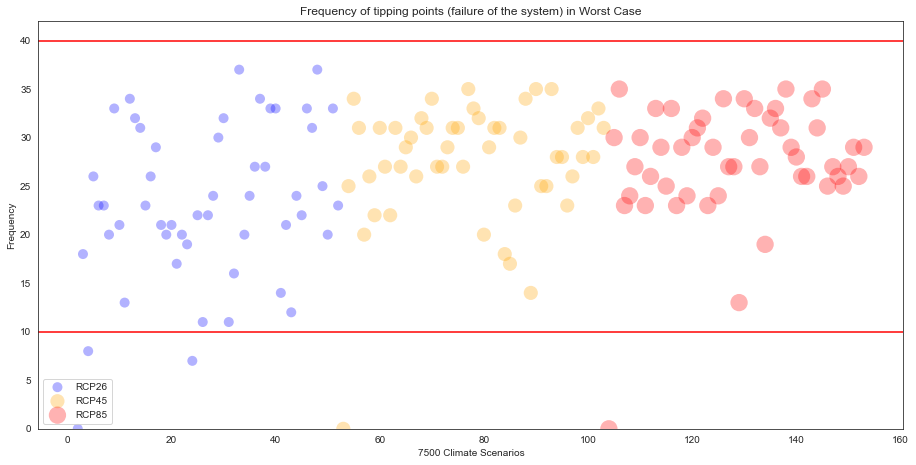

In [116]:
fig, ax1 = plt.subplots(figsize=(15.5,7.5))

ax1.scatter(x_axis[1:(len(matrix_GoodDays26) + 2)],T1RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax1.scatter(x_axis[len(matrix_GoodDays26) + 2: len(matrix_GoodDays26) + len(matrix_GoodDays45) + 3],T1RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax1.scatter(x_axis[len(matrix_GoodDays26) + len(matrix_GoodDays45) + 3:153],T1RCP85[:-1], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


ax1.set_title("Frequency of tipping points (failure of the system) in Worst Case")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("7500 Climate Scenarios")
ax1.set_ylim(bottom=0, top =42)
ax1.axhline(y=10, color='red')
ax1.axhline(y=40, color='red')

ax1.legend()


fig.savefig(os.path.join(rootVisualization, 'tipping_point_All.svg'), format='svg', dpi=1200)

### Tables of the paper: Uncertainty analysis of CH2018 randomness scenarios


In [117]:
from scipy.integrate import simps

def area_max_min_df (df, lengthSim):

    max_scenario = np.array(df.max(axis=1))
    min_scenario = np.array(df.min(axis=1))
    
    # Compute the area using the composite trapezoidal rule.
    areamax1 = trapz(max_scenario, dx=1)
    areamin1 = trapz(min_scenario, dx=1)
    Uncertainty1 = ((areamax1 + areamin1)/2 )/ lengthSim
    
    # Compute the area using the composite Simpson's rule.
    areamax2 = simps(max_scenario, dx=1)
    areamin2 = simps(min_scenario, dx=1)
    Uncertainty2 = ((areamax2 + areamin2)/2 )/ lengthSim
    
    print("Start" + "**" * 30)
    print("Uncertainty Band1 ={} {}".format(Decimal(str(Uncertainty1)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("Uncertainty Band2 ={} {}".format(Decimal(str(Uncertainty2)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("**" * 20 +"End" + "\n")

    return
    #return    max_scenario, min_scenario, Uncertainty1, Uncertainty2

In [118]:
max_scenario = df26_all.max(axis=1)
min_scenario = df26_all.min(axis=1)

In [119]:
max_scenario.to_numpy()

array([98.05047361, 99.90449992, 99.97387846, 98.90914113, 99.00194713,
       99.53134961, 95.98459845, 98.87739037, 98.903467  , 99.11525129,
       99.24370454, 98.78749757, 99.67879313, 99.37900203, 99.90454605,
       97.83004901, 96.71293712, 99.75941965, 95.61203494, 97.74415182,
       98.29797547, 92.82885816, 93.88377811, 99.14949211, 97.0511722 ,
       97.63698411, 88.23455464, 98.19168849, 99.69696951, 98.61770561,
       97.845069  , 98.96442309, 99.61810795, 94.54393023, 98.69083309,
       94.77744966, 98.89752194, 94.21499834, 96.32285431, 96.26779714,
       97.44218995, 95.35708822, 99.97554312, 97.2831261 , 98.10474453,
       97.36657239, 99.80577769, 90.69194673, 97.4032007 , 99.68783117,
       99.06317415, 90.30120333, 84.92508338, 97.7293647 , 97.76301875,
       92.38011332, 99.09658955, 99.47441221, 99.03368752, 89.27882842,
       90.0690362 , 97.08817863, 98.08102773, 98.1424634 , 97.83971304,
       96.88553846, 98.37273072,  9.99105303, 99.58818326, 95.89

In [120]:
min_scenario.to_numpy()

array([101.28500979, 100.0065284 , 103.81213546, 101.01924048,
       100.26372425, 100.69843475, 103.97597429, 101.15902933,
       100.60472264, 100.0429665 , 100.94813387, 102.6784588 ,
       103.06607   , 100.46808098, 101.90042819, 100.92293109,
       100.58156958, 101.77723983, 104.58218978, 102.80029263,
       101.34995691, 107.33004438, 101.1768103 ,  10.34432425,
       108.75583904, 100.18979212, 100.40689432, 106.29931618,
       102.35431224, 102.54737486, 100.87431928, 100.19897772,
       106.38575406, 102.83725408, 102.73599799, 105.36338374,
       107.20870632, 100.05775593, 102.50905078, 100.65997693,
         1.907805  ,  10.51562753, 101.40746727,   1.98088638,
        10.99246177, 100.18578954, 103.50324173, 101.59279679,
       100.60449783, 100.2556661 , 100.97228298, 103.36895066,
       104.30895137,  10.19023822, 101.29043261,  11.76389485,
       101.44132303, 100.61007514, 100.6625569 , 105.56142186,
         0.99615998, 102.29810342, 102.86285801, 104.68

In [121]:
max_scenario.shape

(118,)

In [122]:
print("Resort3 Worst Case")
area_max_min_df (df26_all, 118)
area_max_min_df (df45_all, 118)
area_max_min_df (df85_all, 118)

Resort3 Worst Case
Start************************************************************
Uncertainty Band1 =85.83 days
Uncertainty Band2 =85.83 days
****************************************End

Start************************************************************
Uncertainty Band1 =76.89 days
Uncertainty Band2 =76.89 days
****************************************End

Start************************************************************
Uncertainty Band1 =63.64 days
Uncertainty Band2 =63.61 days
****************************************End



## End